# H vs DT plots used in the paper using short and long equation 
**Following Holmes. et al 2009, the at Ts-Ta =0 H should be zero by forcing intercept**

In [1]:
from __future__ import division
from IPython.display import display
from sympy import diff, init_printing
init_printing() 
init_printing(use_latex='mathjax')
from sympy import diff, Eq, exp, init_printing, log, solve, sqrt
init_printing() 
from sympy.printing import StrPrinter
StrPrinter._print_Quantity = lambda self, expr: str(expr.abbrev)    # displays short units (m instead of meter)

In [2]:
# Using environmental science for symbolic math, see https://github.com/environmentalscience/essm
from essm.variables._core import BaseVariable, Variable
from essm.equations import Equation
from essm.equations.physics.thermodynamics import *
from essm.variables.units import derive_unit, SI, Quantity
from essm.variables.utils import replace_defaults, replace_variables
from sympy.physics.units import joule, kelvin,gram,kilogram,meter, mole, pascal, second
from essm.variables.utils import generate_metadata_table
from matplotlib import rc 
import matplotlib
import math
import sympy
from essm.variables.units import derive_unit, derive_baseunit, markdown, SI
from essm.variables.units import joule, kelvin, kilogram, meter, pascal, second, watt
from matplotlib.cbook import flatten

from sympy import diff, Eq, exp, init_printing, log, solve, sqrt
import re


In [3]:
import numpy as np
from netCDF4 import Dataset
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [4]:
import glob
from netCDF4 import Dataset
import os
from sympy.printing.theanocode import theano_function

## Plot Path :

In [5]:
plt_path= '../plots'


## Brookings

In [6]:
filename = '../Data/fluxnet/AMF_US-Bkg_BASE_HH_4-1.csv'
brookframe = pd.read_csv(filename, error_bad_lines=False,  na_values=-9999, skiprows= 2)
           

In [7]:
brookframerang = pd.date_range('1/1/2004 00:00', periods=len(brookframe.index), freq='30min')
brookframe.index = brookframerang
brookframe=brookframe.replace(-9999.000000, np.nan)
brookframe["T_a"] = pd.Series(brookframe.TA + 273.15, index=brookframe.index)
brookframe['Fn']=brookframe.NETRAD
brookframe['Ws']=brookframe.WS
brookframe['Flu']=brookframe.LW_OUT
brookframe['Fld']=brookframe.LW_IN
brookframe['Fsu']=brookframe.SW_OUT
brookframe['Fsd']=brookframe.SW_IN
brookframe['Fh']=brookframe.H

#brookframe

In [8]:
brookframe.P.mean()

## Yatir

In [9]:
filename = '../Data/fluxnet/EFDC_L2_Flx_ILYat_2005_v03_30m.txt'

yatframe = pd.read_csv(filename, error_bad_lines=False,  na_values=-9999)
                      


In [10]:
yatframerang = pd.date_range('1/1/2005 00:00', periods=len(yatframe.index), freq='30min')
yatframe.index = yatframerang
yatframe=yatframe.replace(-9999.000000, np.nan)
yatframe["T_a"] = pd.Series(yatframe.TA + 273.15, index=yatframe.index)
yatframe['Fn']=yatframe.NETRAD
yatframe['Ws']=yatframe.WS
yatframe['Flu']=yatframe.LW_OUT
yatframe['Fld']=yatframe.LW_IN
yatframe['Fsu']=yatframe.SW_OUT
yatframe['Fsd']=yatframe.SW_IN
yatframe['Fh']=yatframe.H

In [11]:
yatframe.SW_OUT.mean()

In [12]:
yatframe.SW_IN.mean()

## Alice Spring:

In [13]:
AS = '../Data/tern/AS/' 
ASncfile = xr.open_mfdataset(AS +'/*.nc', combine='by_coords')#, combine='nested')

In [14]:
#ASncfile.info()

sitename = [ASncfile,HSncfile]
for site in sitename:
    canopy_height=site.canopy_height
    print(canopy_height)
#canopy_height=ASncfile.canopy_height
#print(canopy_height)
#'canopy_height_{0}'.format(str(sitename))=ASncfile.canopy_height
####
anopy_ht_as=ASncfile.canopy_height
can_ht=re.findall(r'\d*\.?\d+',canopy_ht_as)
can_ht=float(can_ht[0])
tower_ht=ASncfile.tower_height
wind_measure_ht = 9.25
humidi_measure_ht=11.25
k=0.667
d=(k*can_ht)
zom_as = 0.123 * can_ht
zoh_as=0.1*zom_as
print(zoh_as)

### dataframe

In [15]:
ASncfile.canopy_height

'6.5m'

In [16]:

asframe= ASncfile.to_dataframe()
asframe.index=asframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
asframe.reset_index(inplace=True)
asframe.index=asframe.time 
asframe=asframe[(asframe.Ws_QCFlag==00)&(asframe.Fld_QCFlag==00)&(asframe.Flu_QCFlag==00)&(asframe.Fh_QCFlag==00)
               &(asframe.Ta_QCFlag==00)]
asframe=asframe.replace(-9999.000000, np.nan)
asframe["T_a"] = pd.Series(asframe.Ta + 273.15, index=asframe.index)


#asframe

In [17]:
#asframe.ustar

In [18]:
#df=asframe[(asframe.index.year == 2016) & (asframe.index.month == 1)&(asframe.Fn > 25)  & (asframe.Ws > 2)]
#print(df.ustar,df.Ws)

In [19]:
#print(aero_res_as.resample('M').median())

## Howard Spring

In [20]:
HS = '../Data/tern/HS/' 
HSncfile = xr.open_mfdataset(HS +'/*.nc',combine='by_coords')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [21]:
#HSncfile.info()

### vdict Howards spring:

In [22]:
hsframe= HSncfile.to_dataframe()
hsframe.index=hsframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
hsframe.reset_index(inplace=True)
hsframe.index=hsframe.time 
hsframe=hsframe[(hsframe.Fn_QCFlag==00)&(hsframe.Fld_QCFlag==00)&(hsframe.Flu_QCFlag==00)&(hsframe.Ta_QCFlag==00)&(hsframe.Fh_QCFlag==00)]
hsframe=hsframe.replace(-9999.000000, np.nan)
hsframe["T_a"] = pd.Series(hsframe.Ta + 273.15, index=hsframe.index)




/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [23]:
#print(aero_res_hs.resample('M').median())

## Tumarumba:

In [24]:
Tum = '../Data/tern/TUM/' 
Tumncfile = xr.open_mfdataset(Tum+'/*.nc',combine='by_coords')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


### Tum Vdict:

In [25]:
#Tumncfile.info()

In [26]:
tumframe= Tumncfile.to_dataframe()
tumframe.index=tumframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
tumframe.reset_index(inplace=True)
tumframe.index=tumframe.time
tumframe=tumframe[(tumframe.Ws_QCFlag==00)&(tumframe.Fld_QCFlag==00)&(tumframe.Flu_QCFlag==00)&(tumframe.Fh_QCFlag==00)&(tumframe.Ta_QCFlag==00)]
tumframe=tumframe.replace(-9999.000000, np.nan)
tumframe["T_a"] = pd.Series(tumframe.Ta + 273.15, index=tumframe.index)



/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [27]:
#tumframe

## Sturt Plains:

In [28]:
SP = '../Data/tern/sturt_plains/'
Spncfile = xr.open_mfdataset(SP +'/*.nc', combine='by_coords' )

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

### sp vdict

In [29]:
spframe= Spncfile.to_dataframe()
can_ht_sp=Spncfile.canopy_height
spframe.index=spframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
spframe.reset_index(inplace=True)
spframe.index=spframe.time
spframe=spframe[(spframe.Ws_QCFlag==00)&(spframe.Fld_QCFlag==00)&(spframe.Flu_QCFlag==00)&(spframe.Fh_QCFlag==00)&(spframe.Ta_QCFlag==00)]
spframe=spframe.replace(-9999.000000, np.nan)
spframe["T_a"] = pd.Series(spframe.Ta + 273.15, index=spframe.index)


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

## Litchfield:

In [30]:
LF= '../Data/tern/litchfield/' 
LFncfile = xr.open_mfdataset(LF +'/*.nc')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future defa

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

### vdict LF

In [31]:
lfframe= LFncfile.to_dataframe()
lfframe.index=lfframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
lfframe.reset_index(inplace=True)
lfframe.index=lfframe.time
lfframe=lfframe[(lfframe.Ws_QCFlag==00)&(lfframe.Fld_QCFlag==00)&(lfframe.Flu_QCFlag==00)&(lfframe.Fh_QCFlag==00)&(lfframe.Ta_QCFlag==00)]
lfframe=lfframe.replace(-9999.000000, np.nan)
lfframe["T_a"] = pd.Series(lfframe.Ta + 273.15, index=lfframe.index)


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [32]:
#df_lf

## adelaide River:

In [33]:
AR = '../Data/tern/AdelaideRiver/' 

ARncfile = xr.open_mfdataset(AR +'/*.nc')  #,combine='nested')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


### Vdict ar

In [34]:
arframe= ARncfile.to_dataframe()
arframe.index=arframe.index.set_names(['Time'])#'latitute', 'longitute'
arframe.reset_index(inplace=True)
arframe['timestamp']= pd.to_datetime(arframe[['Year' ,'Month','Day','Hour','Minute','Second']])
arframe.index=arframe.timestamp
arframe=arframe[(arframe.Ws_CSAT_QCFlag==00)&(arframe.Fld_QCFlag==00)&(arframe.Flu_QCFlag==00)&(arframe.Fh_QCFlag==00)&(arframe.Ta_QCFlag==00)]
arframe=arframe.replace(-9999.000000, np.nan)
arframe["T_a"] = pd.Series(arframe.Ta + 273.15, index=arframe.index)
arframe["Ws"] = arframe.Ws_CSAT



In [35]:
#arframe

##  Titree

In [36]:
Titree = '../Data/tern/Ti_tree/' 
TTncfile = xr.open_mfdataset(Titree +'/*.nc') #, concat_dim= 'ensemble')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will 

In [37]:
titreeframe= TTncfile.to_dataframe()
titreeframe.index=titreeframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
titreeframe.reset_index(inplace=True)
titreeframe.index=titreeframe.time 
titreeframe=titreeframe[(titreeframe.Ws_QCFlag==00)&(titreeframe.Fld_QCFlag==00)&(titreeframe.Flu_QCFlag==00)&(titreeframe.Fh_QCFlag==00)&(titreeframe.Ta_QCFlag==00)]#&(titreeframe.Fn_QCFlag==00)&(titreeframe.Ws_QCFlag==00)]
titreeframe=titreeframe.replace(-9999.000000, np.nan)
titreeframe["T_a"] = pd.Series(titreeframe.Ta + 273.15, index=titreeframe.index)


## Dalyuncleared

In [38]:
dalyunc = '../Data/tern/dalyuncleared/'
dalyuncncfile = xr.open_mfdataset(dalyunc +'/*.nc',compat='override',coords='all')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future defa

In [39]:
dalyuncframe= dalyuncncfile.to_dataframe()
dalyuncframe.index=dalyuncframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
dalyuncframe.reset_index(inplace=True)
dalyuncframe.index=dalyuncframe.time 
dalyuncframe=dalyuncframe[(dalyuncframe.Ws_QCFlag==00)&(dalyuncframe.Fld_QCFlag==00)&(dalyuncframe.Flu_QCFlag==00)&(dalyuncframe.Fh_QCFlag==00)&(dalyuncframe.Ta_QCFlag==00)]#&(dalyuncframe.Fn_QCFlag==00)&(dalyuncframe.Ws_CSAT_QCFlag==00)]
dalyuncframe=dalyuncframe.replace(-9999.000000, np.nan)
dalyuncframe["T_a"] = dalyuncframe.Ta + 273.15


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

## variable def:

In [40]:
class epsilon (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon'
    #default = 0.9

        
class sigma (Variable):
    """ stefan-boltzmann constant""" 
    unit =  watt/(meter**2 * kelvin**4)
    latex_name ='\sigma'
    default = 5.6704 * 10**-8


class T_s(Variable): 
    """Effective surface temperature.""" 
    unit = kelvin 
    latex_name ='T_{s}'
       
    
class T_a(Variable): 
    """Air temperature""" 
    unit = kelvin 
    latex_name ='T_a'   
 
    
class R_lout(Variable): 
    """upwelling longwave""" 
    unit = watt/meter**2
    latex_name ='R_{l,out}'
    #default = Hs.longwave_up
    
    
class H(Variable): 
    """sensible heat""" 
    unit = watt/meter**2
    latex_name ='H'
    
class delta_T(Variable): 
    """difference in surface and air temperature""" 
    unit = kelvin 
    latex_name ='\Delta T'

    

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "essm.variables.physics.thermodynamics:T_a" will be overridden by "__main__:<class '__main__.T_a'>"
  instance[expr] = instance


In [41]:
# calculation of Ts considering both eitted and reflected radiation(Mike)
class R_lin(Variable):
    """Incoming Longwave radiation"""
    latex_name = r'R_{l,in}'
    unit = watt/meter**2
class eq_Rlout_Rlin(Equation):
    """Upwelling longwave radiation including reflected."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4 + (1-epsilon) * R_lin)
eq_Rlout_Rlin

In [42]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout_Rlin

### SEQ

In [43]:
class eq_Rlout(Equation):
    """Upwelling longwave radiation."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4)
eq_Rlout


In [44]:
class eq_Ts_Rlout(eq_Rlout.definition):
    """Surface temperature as a function of LWout"""
    soln = solve(eq_Rlout, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout

# Plot-scale epsilon using LEQ:

### function

In [45]:

def opteps_RLM (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    k=0
    epsilon1=np.arange(0.4,1,0.002).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years) & (df_all.index.month == mnth)& 
                (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
        tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_rlm.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_rlm.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
        
        
    df_eps_ref=opteps_rlm.copy()## copying data frame for sorting based on minimum rmse
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0])
        
            

In [46]:
opteps_RLM (2016, spframe,6)

In [47]:
def opteps_monthly (site,years, df_all,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    
   
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth) 
                & (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn<25) | (df_all.Ws < 2))]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
    tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        
        
    list_T_s = tf_T_s(df.Fld,df.Flu)
    list_T_s2 = tf_T_s2(df12.Fld,df12.Flu)
    df = df.assign(T_s=list_T_s)
    list_H = df.Fh
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    df12 = df12.assign(T_s2=list_T_s2)
    list_DT2 = df12.T_s2 - df12.T_a
    df12 = df12.assign(DT2=(df12.T_s2 - df12.T_a))#
   
   
        ####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    #####
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x + c
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                  str(np.round(r2,decimals=eqdigits)),
                                                                  str(np.round(RMSE, decimals=eqdigits)),
                                                                  str(np.round(N, decimals=eqdigits)))

        
        
    plt.figure(figsize=(8,5))    
    plt.plot(x,y,"+",label='_nolegend_')
    plt.plot(df12.DT2,df12.Fh,".k",label='_nolegend_')
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=24)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontweight = 'bold',fontsize=24)
    plt.title('{0}, {1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    plt.xticks(fontsize=20) #[-5,0,5,10,15],
    plt.yticks(fontsize=20)
    #plt.xlim(-5, 12)
    #plt.ylim(-150, 500)
    plt.legend(loc="best",fontsize=14)
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

37.39978995968666


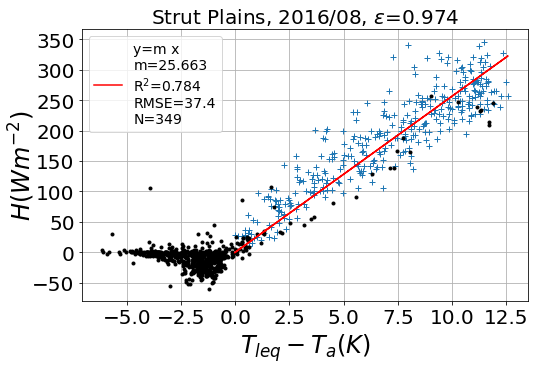

37.39978995968666


In [48]:
opteps_monthly ("Strut Plains",2016, spframe,8,0.974)

242.85439801271906


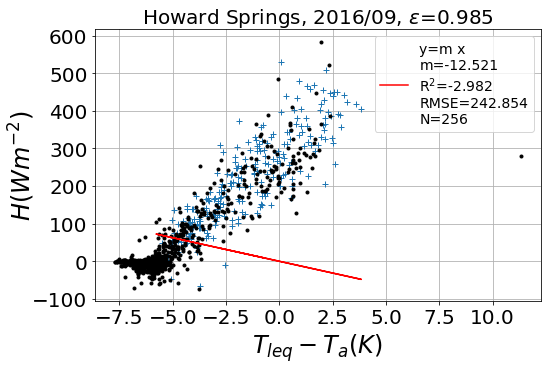

242.85439801271906


In [49]:
opteps_monthly ("Howard Springs",2016, hsframe,9,0.985)

29.207763173047187


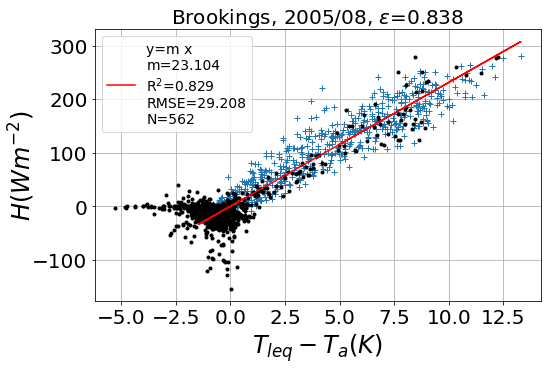

29.207763173047187


In [50]:
opteps_monthly ('Brookings',2005,brookframe,8,0.838)

## Sturt Plains 

27.348620535508253


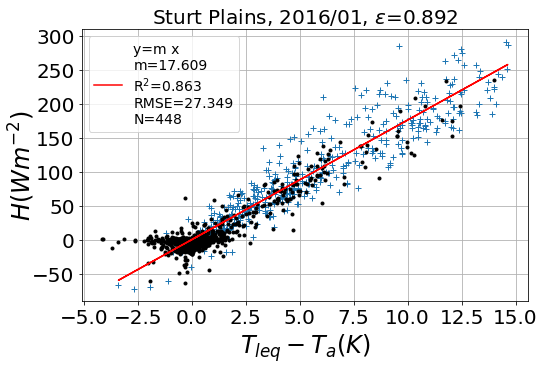

27.348620535508253
19.92765784620188


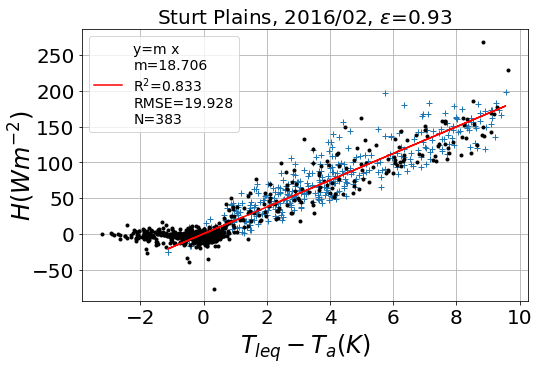

19.92765784620188
27.047618389079993


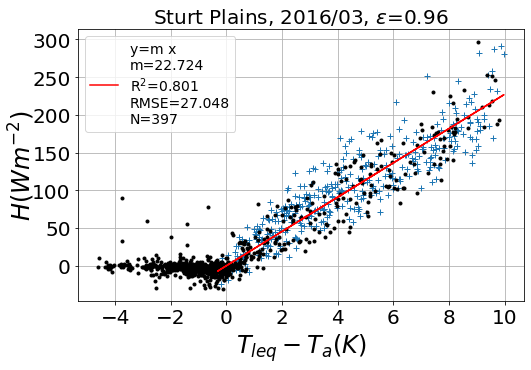

27.047618389079993
33.87503840095872


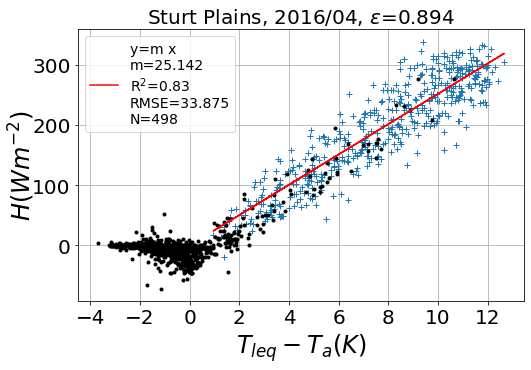

33.87503840095872
30.336507382324953


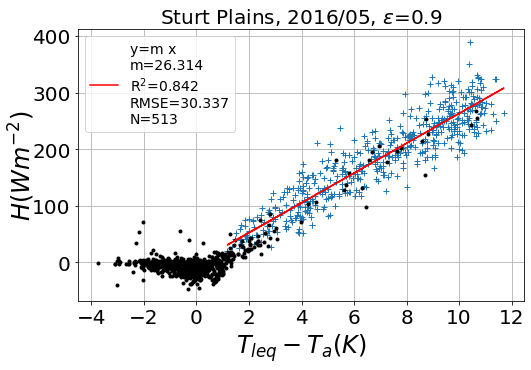

30.336507382324953
32.81320717644823


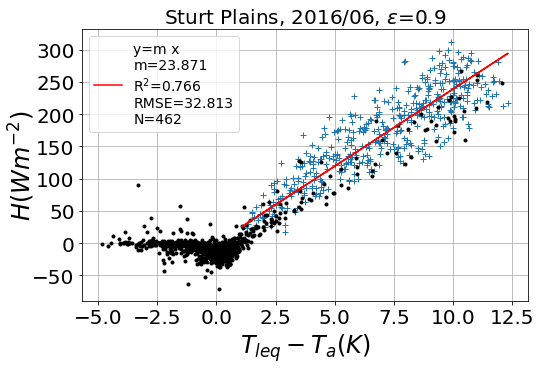

32.81320717644823
30.525199814785204


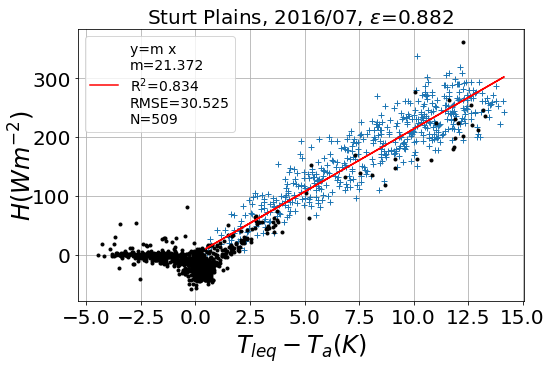

30.525199814785204
31.770541751357975


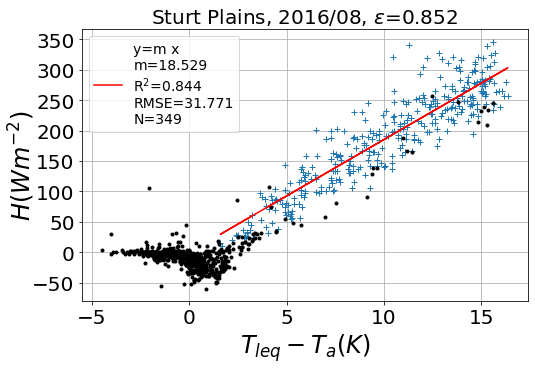

31.770541751357975
34.89949274902972


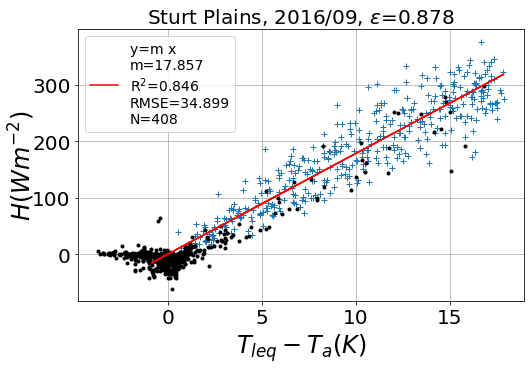

34.89949274902972
43.94155785807407


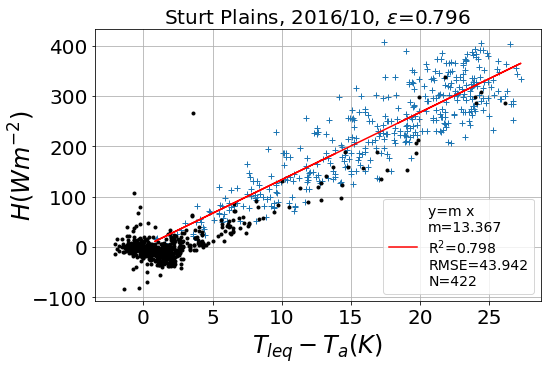

43.94155785807407
33.642114984048284


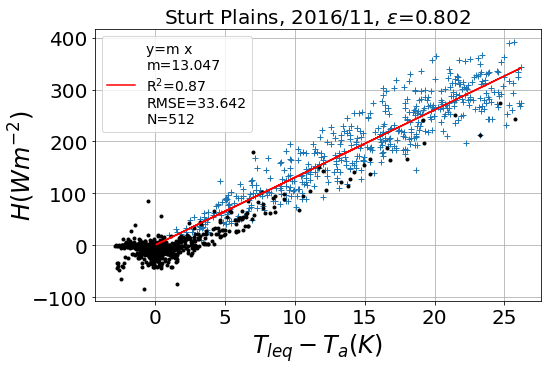

33.642114984048284
39.808902554488675


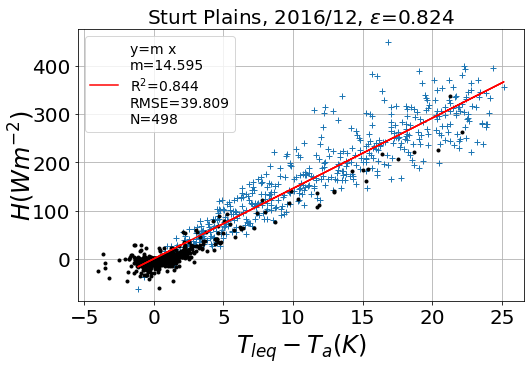

39.808902554488675
13.823547095705306


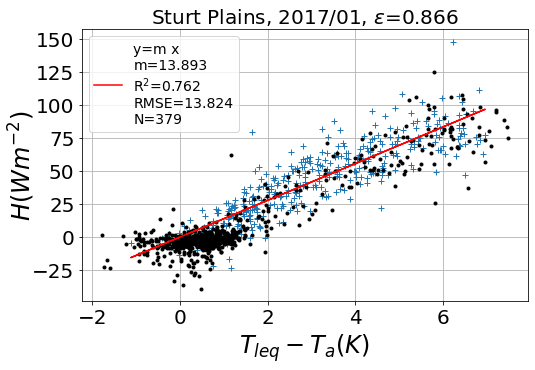

13.823547095705306
18.59988896778739


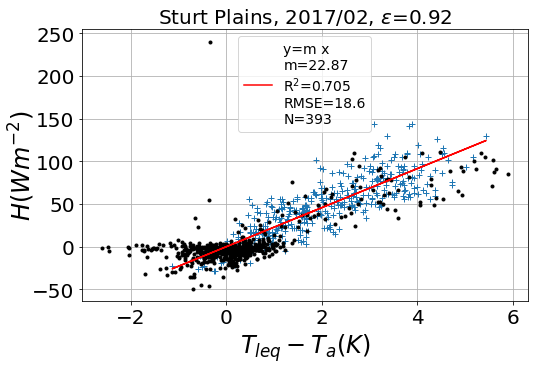

18.59988896778739
21.625451788067377


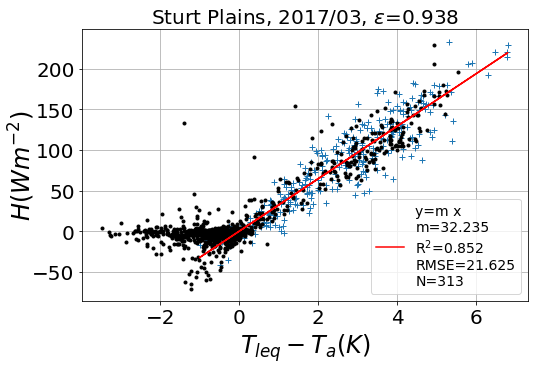

21.625451788067377
30.188911627514862


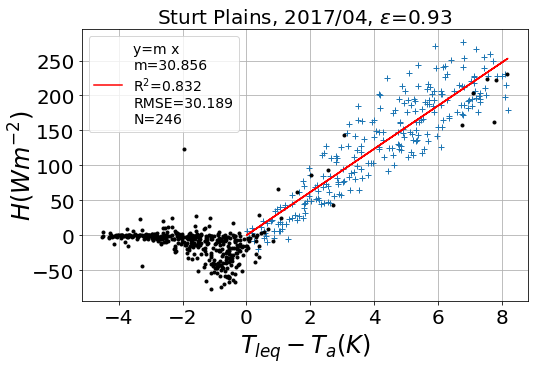

30.188911627514862
33.11933022202069


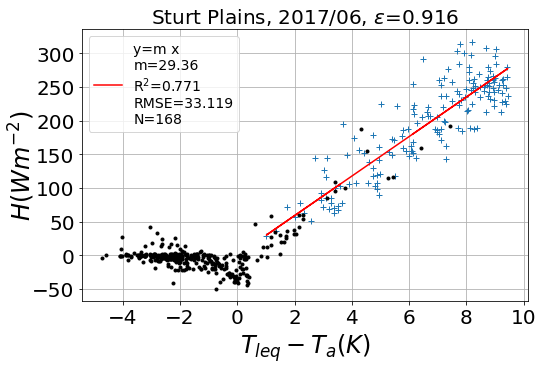

33.11933022202069
29.736967208568377


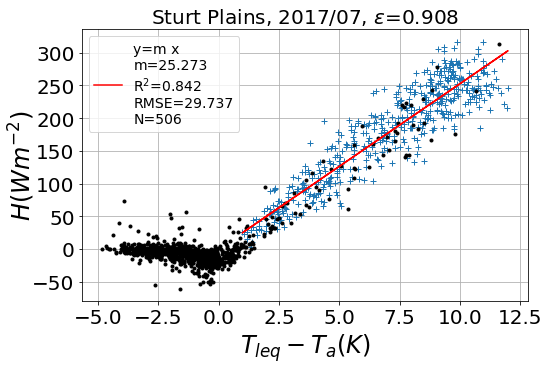

29.736967208568377
33.60313302194843


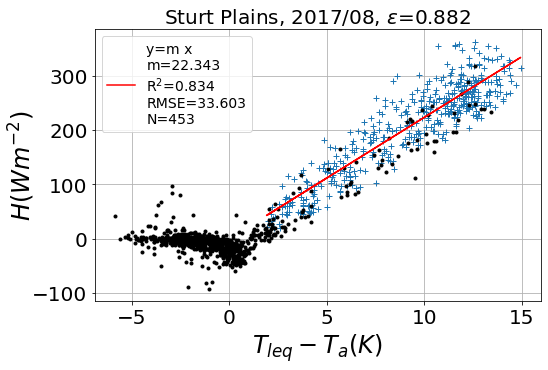

33.60313302194843
32.83381274388545


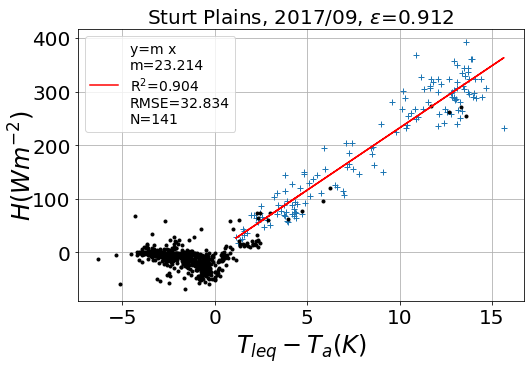

32.83381274388545
37.83804764413752


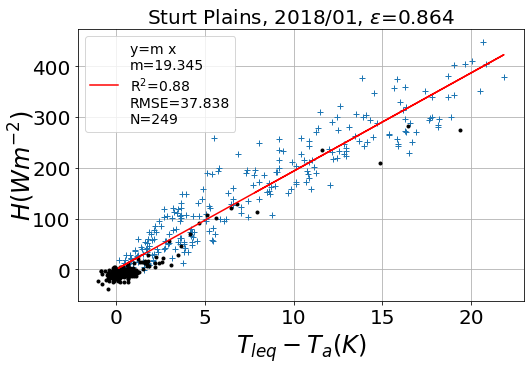

37.83804764413752
28.985119855662653


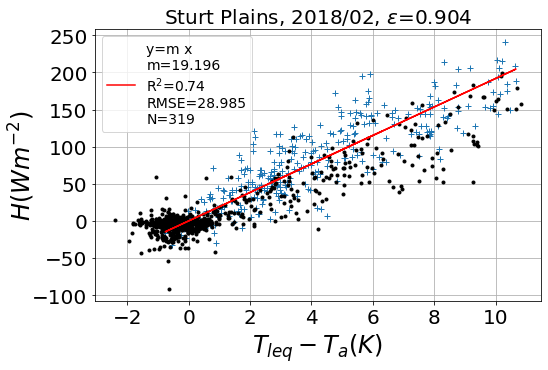

28.985119855662653
34.134721427180125


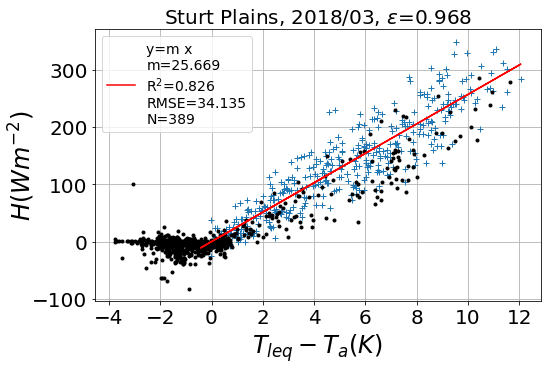

34.134721427180125
32.08815841203151


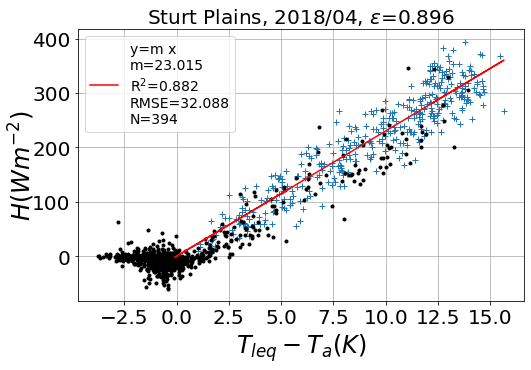

32.08815841203151
32.65528481947527


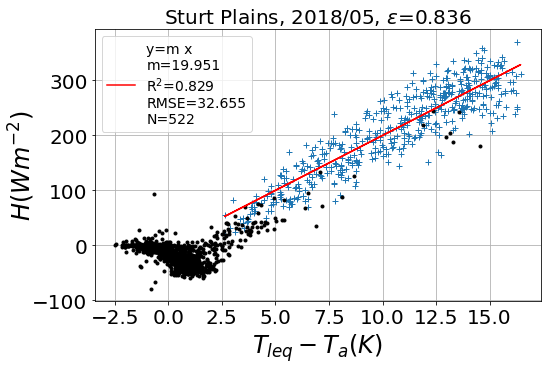

32.65528481947527
31.177246189657296


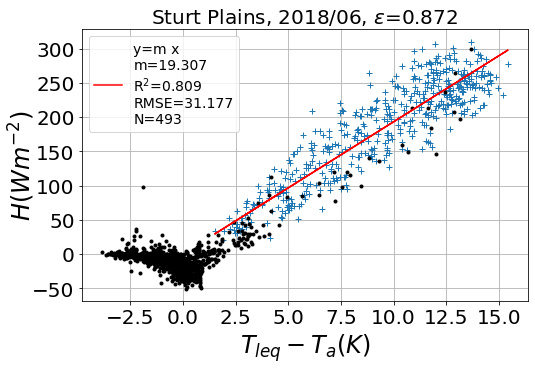

31.177246189657296
36.52484415296616


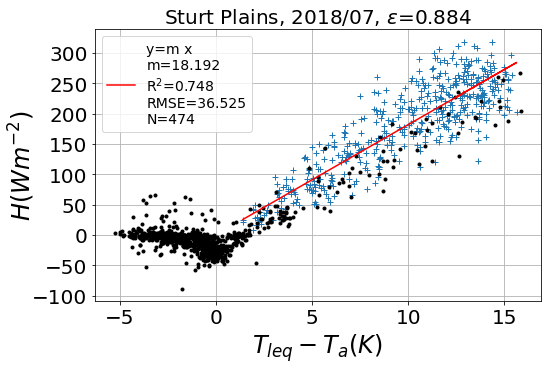

36.52484415296616
39.064283814174345


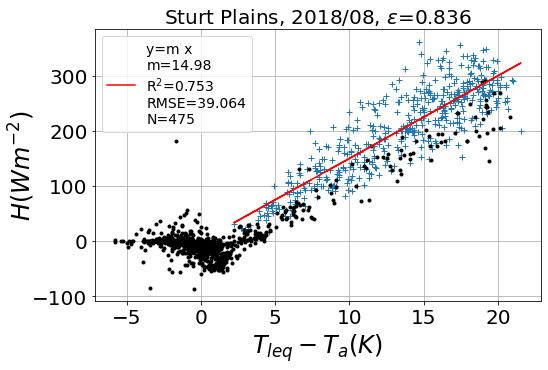

39.064283814174345
41.50293261018728


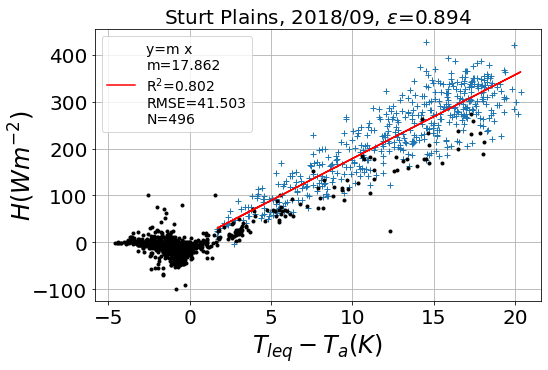

41.50293261018728
41.702974897572496


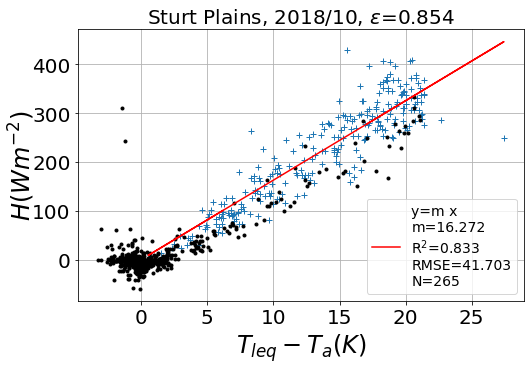

41.702974897572496
32.32314805506239


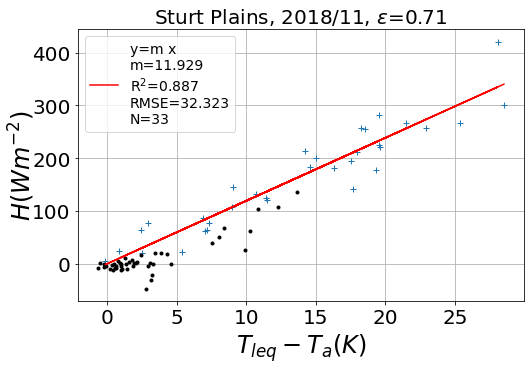

32.32314805506239
42.10905577341723


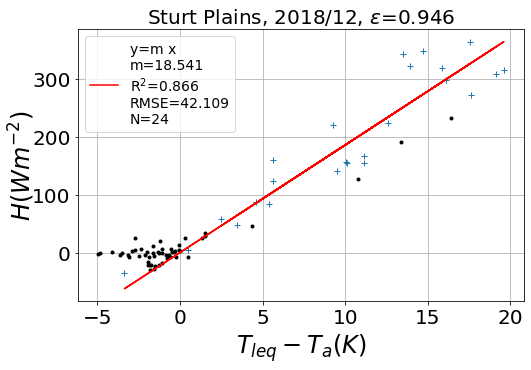

42.10905577341723


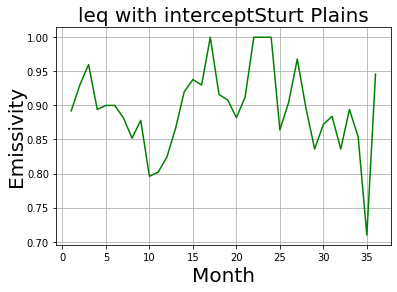

In [51]:
site="Sturt Plains"
df=spframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_sp=[]
list_slope_sp=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_sp.append(opt_eps)
            list_slope_sp.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_sp.append(1)
            list_slope_sp.append(np.nan)

plt.plot(np.arange(len(list_opteps_sp))+1,list_opteps_sp,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq with intercept{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Alice spring

57.033267519906154


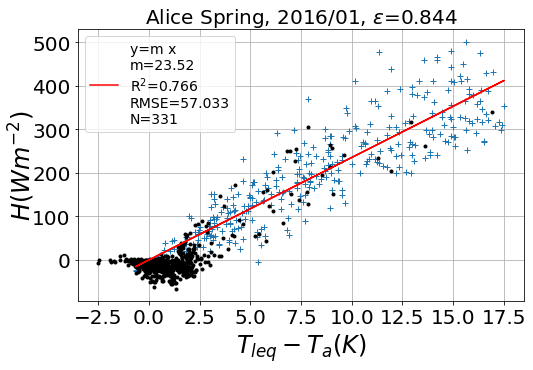

57.033267519906154
52.03522685737121


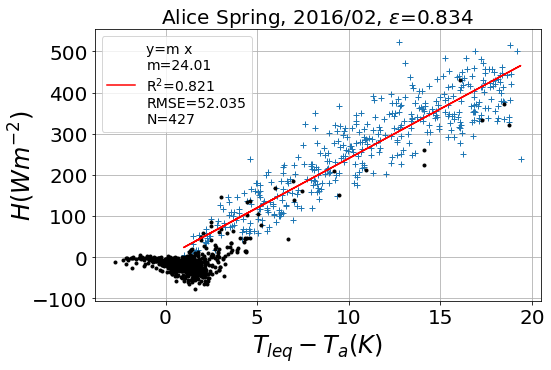

52.03522685737121
54.473347816569216


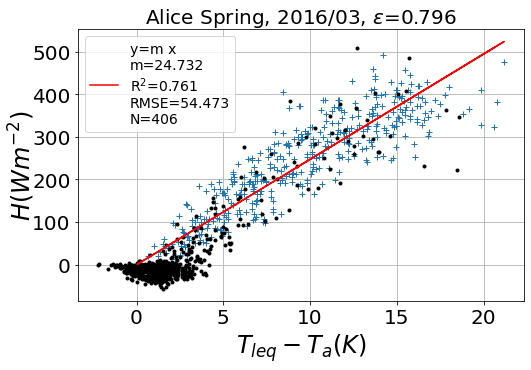

54.473347816569216
43.82396811107325


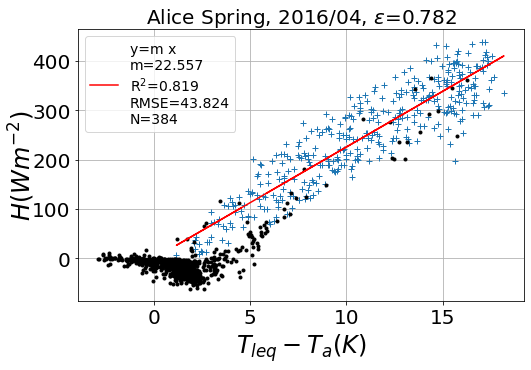

43.82396811107325
40.588112500844595


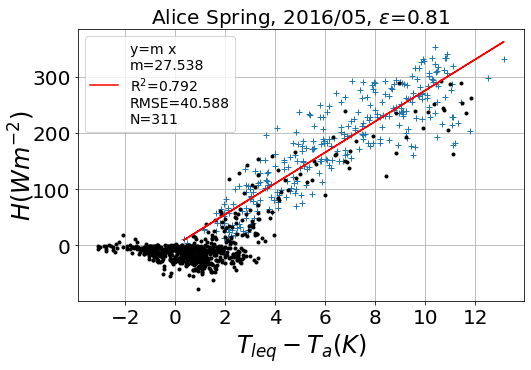

40.588112500844595
37.42936960367241


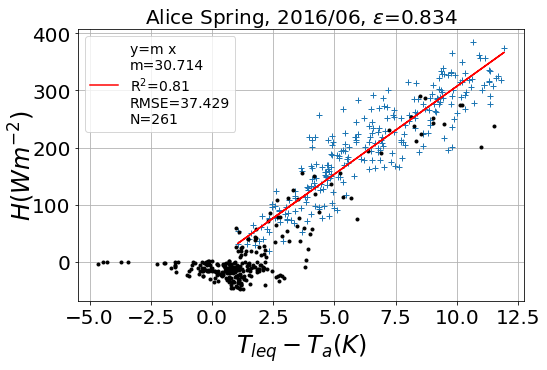

37.42936960367241
39.25659798976656


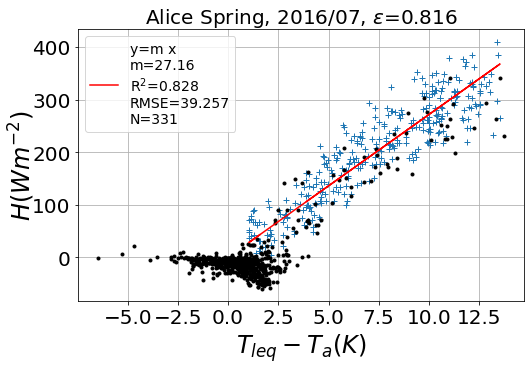

39.25659798976656
46.139641070468194


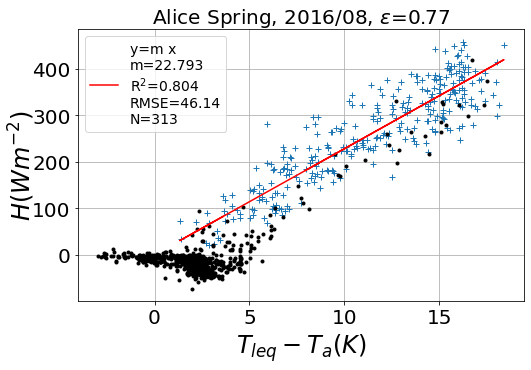

46.139641070468194
44.13171030808857


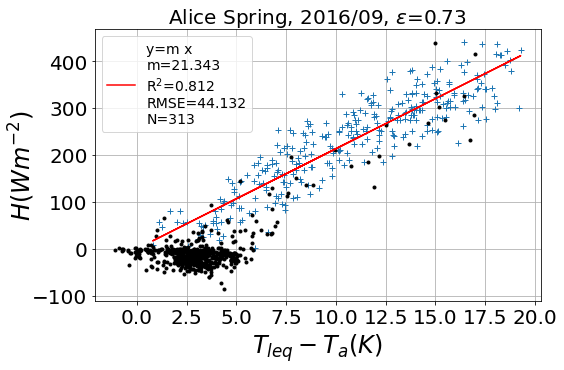

44.13171030808857
56.36995383131335


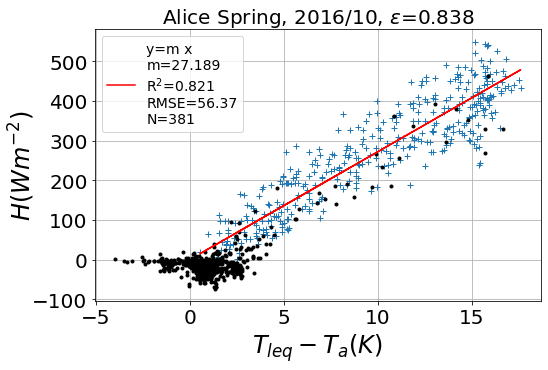

56.36995383131335
55.576918662648026


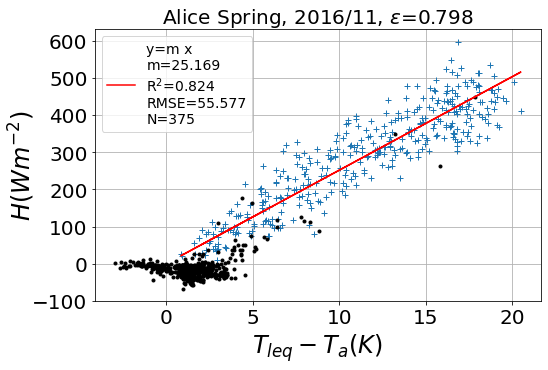

55.576918662648026
64.62646232029176


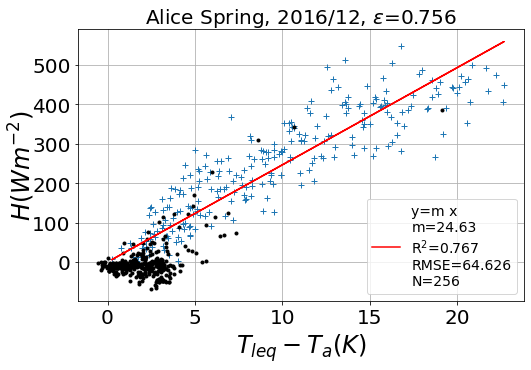

64.62646232029176
52.35800876153897


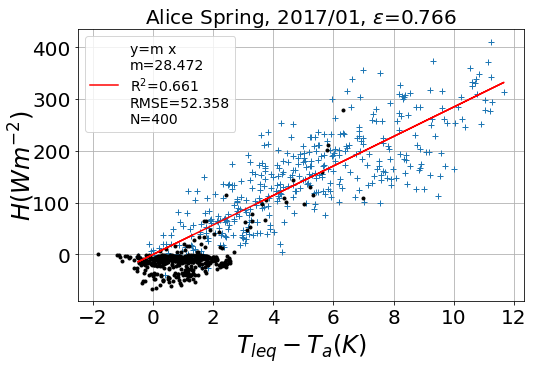

52.35800876153897
44.516567937323835


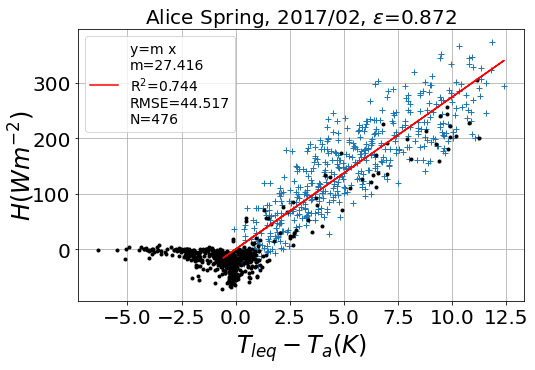

44.516567937323835
43.62427865223221


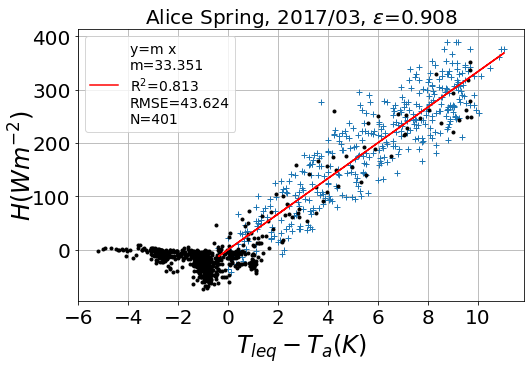

43.62427865223221
48.78966241938613


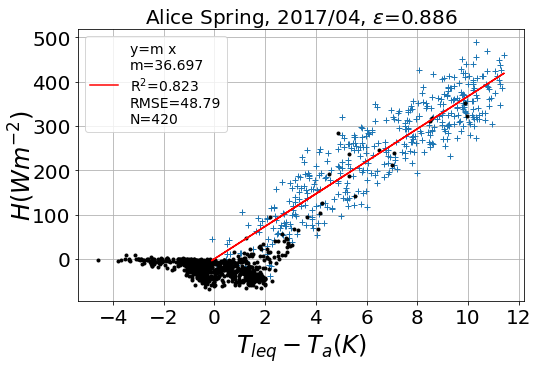

48.78966241938613
47.116310736056725


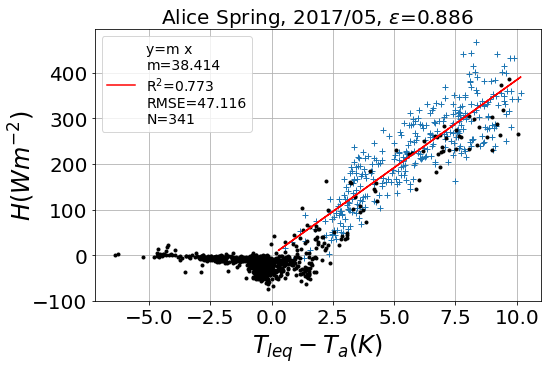

47.116310736056725
42.129144412172025


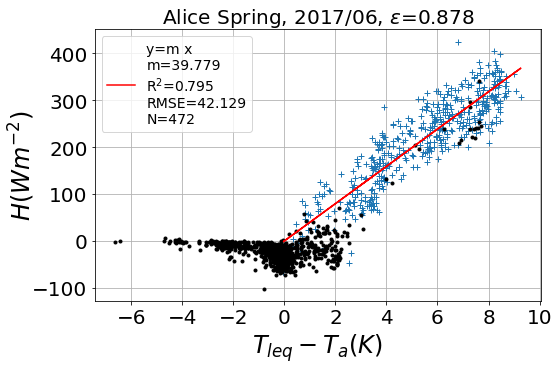

42.129144412172025
39.10437504811475


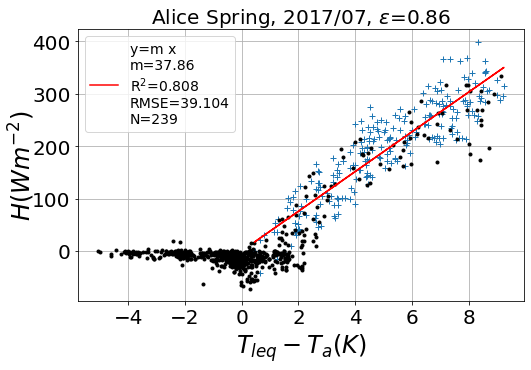

39.10437504811475
40.8763243177916


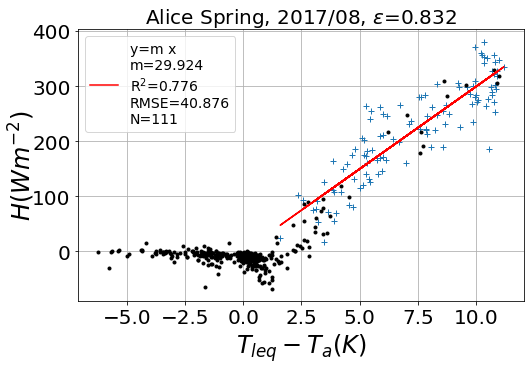

40.8763243177916
53.393051742282175


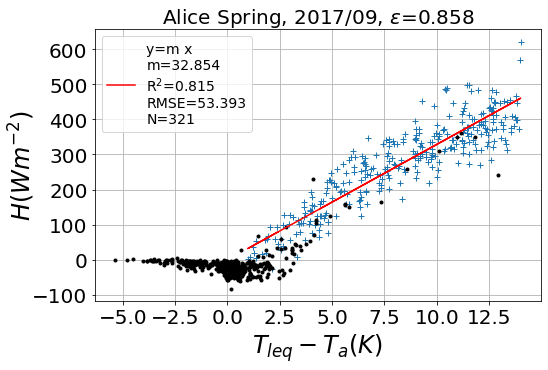

53.393051742282175
67.98421425307343


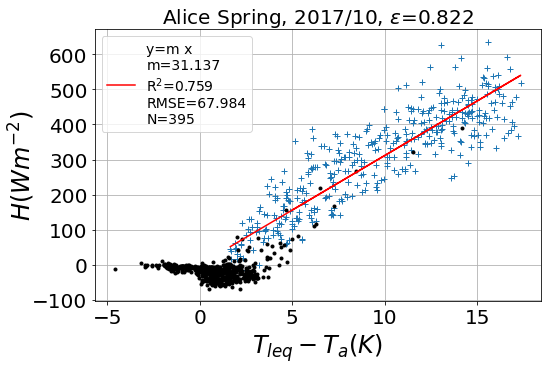

67.98421425307343
58.625651197647166


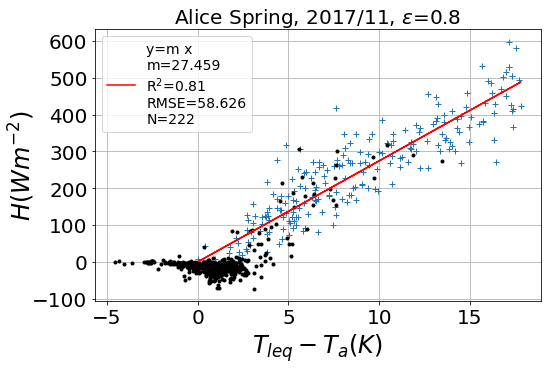

58.625651197647166
58.69447405923526


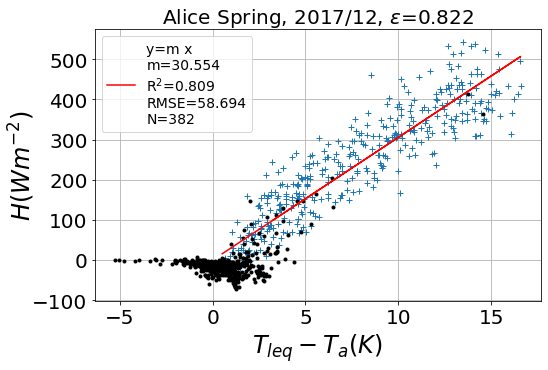

58.69447405923526
64.64695870782488


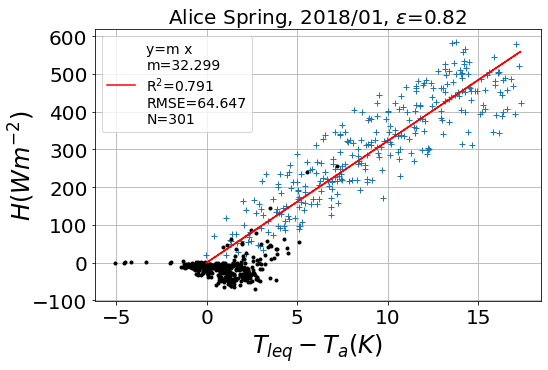

64.64695870782488
64.01140419328688


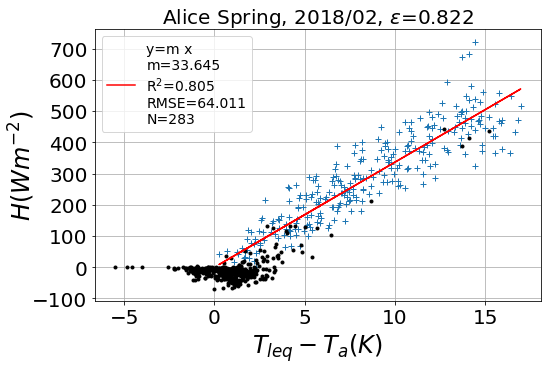

64.01140419328688
59.45885606862699


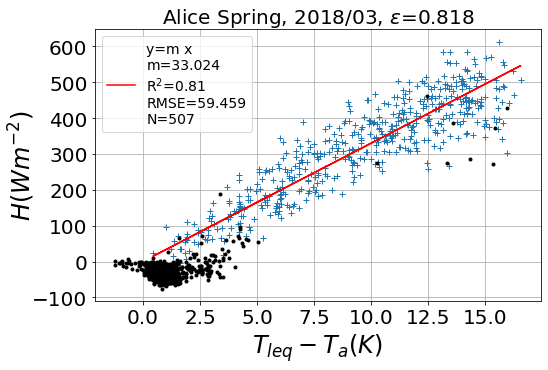

59.45885606862699
53.10402120756019


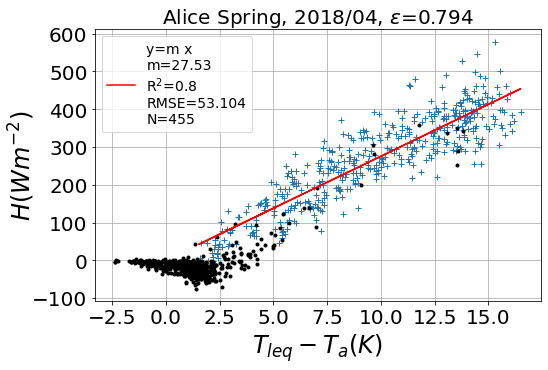

53.10402120756019
48.76952269681063


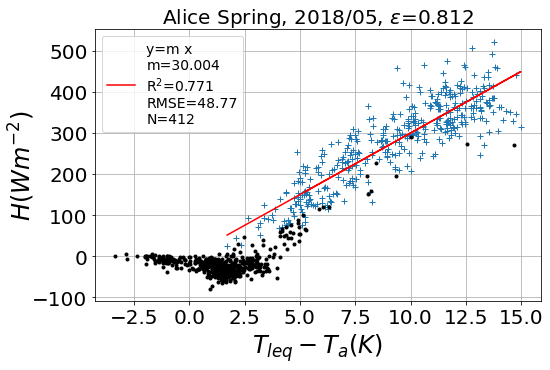

48.76952269681063
45.04987093634873


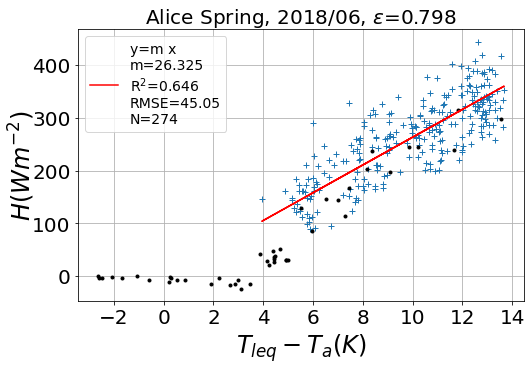

45.04987093634873
45.834941498590815


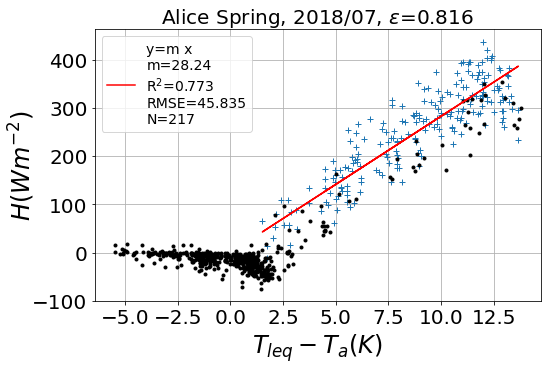

45.834941498590815
55.260195766059105


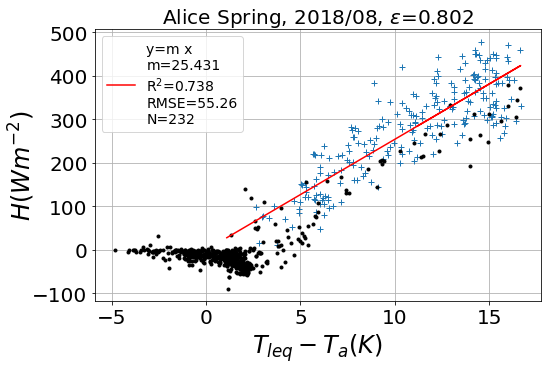

55.260195766059105
60.713748723352055


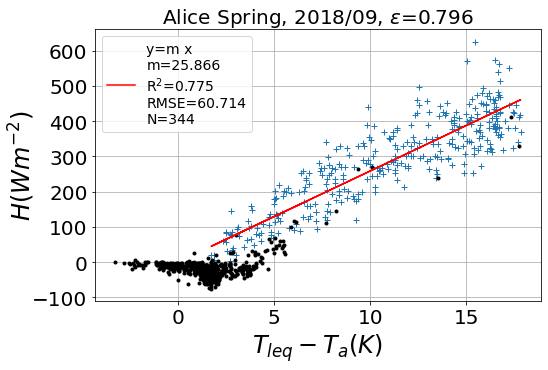

60.713748723352055
56.75260962004582


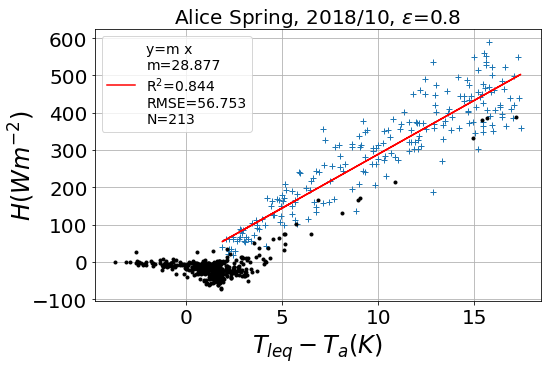

56.75260962004582
56.549127322474085


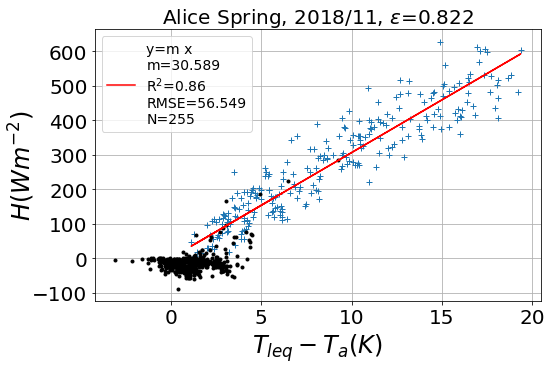

56.549127322474085
61.09391366041278


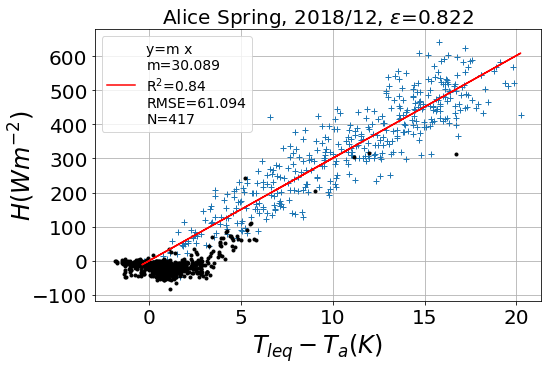

61.09391366041278


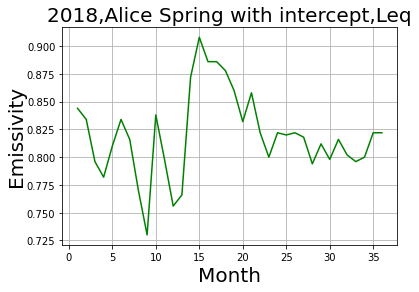

In [52]:
site="Alice Spring"
df=asframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_as=[]
list_slope_as=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_as.append(opt_eps)
            list_slope_as.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_as.append(np.nan)
            list_slope_as.append(np.nan)

eps_as=np.array(list_opteps_as)## converting into array
eps_as=eps_as[~np.isnan(eps_as)]## removing nan
plt.plot(np.arange(len(eps_as))+1,eps_as[~np.isnan(eps_as)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = '{0},Alice Spring with intercept,Leq'.format(str(np.round(yr)))
fname = 'as_Leq_intercept{0}'.format(str(np.round(yr)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

### Howard Spring:

71.78079775592278


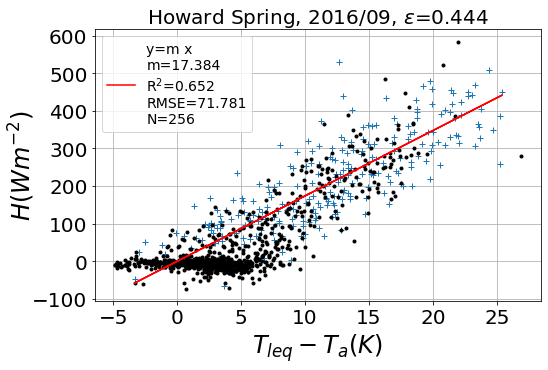

71.78079775592278
69.69979381287001


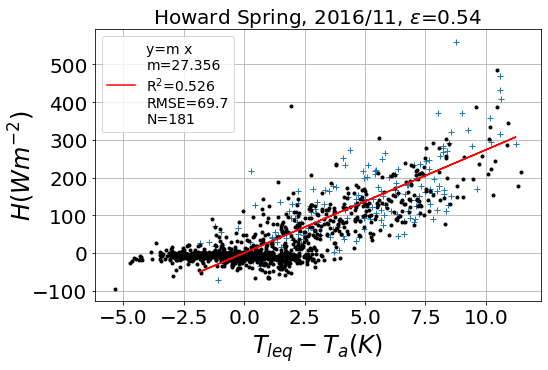

69.69979381287001
51.6978064934018


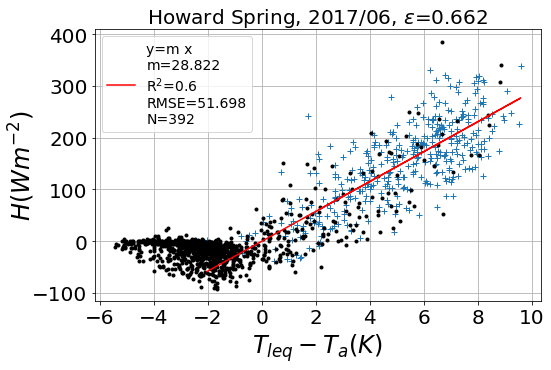

51.6978064934018
69.97200244511012


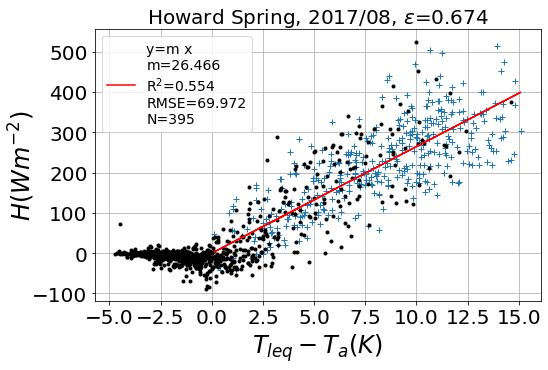

69.97200244511012
83.59983458333755


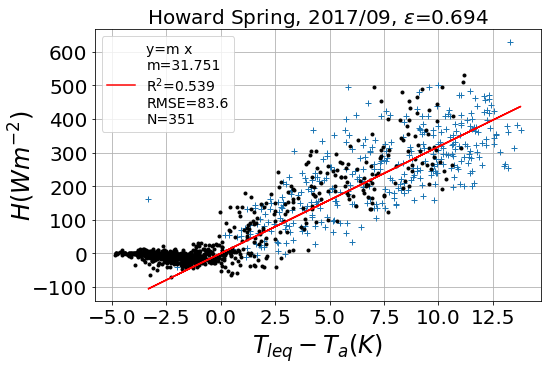

83.59983458333755
68.02082714269464


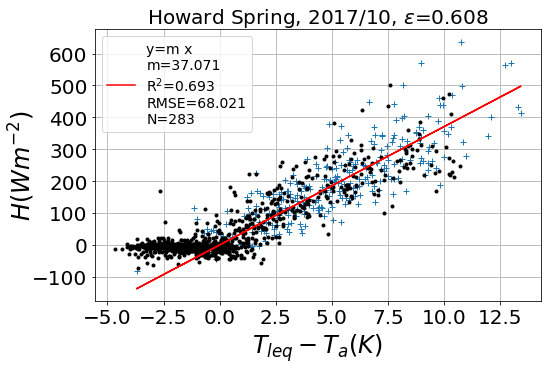

68.02082714269464
60.561104984112326


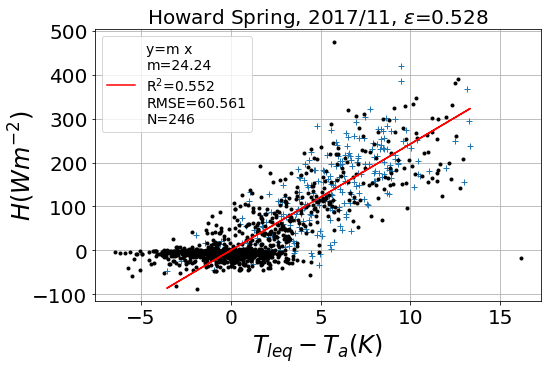

60.561104984112326
65.74681877717099


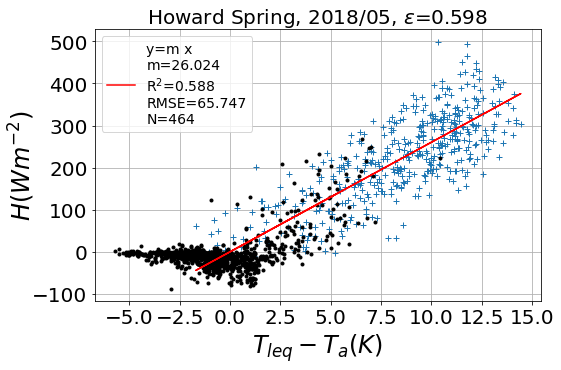

65.74681877717099
65.19012742663249


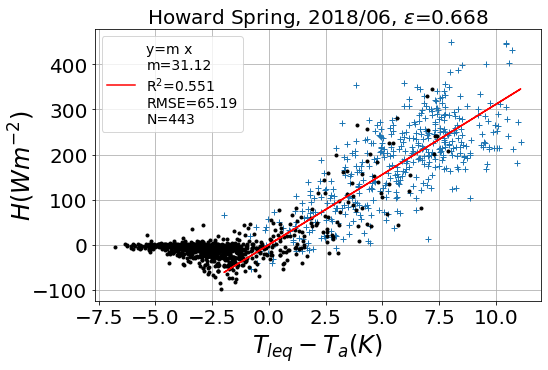

65.19012742663249
68.13370225287211


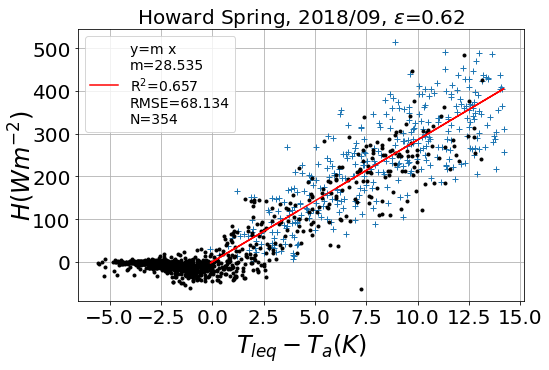

68.13370225287211
83.07125102094842


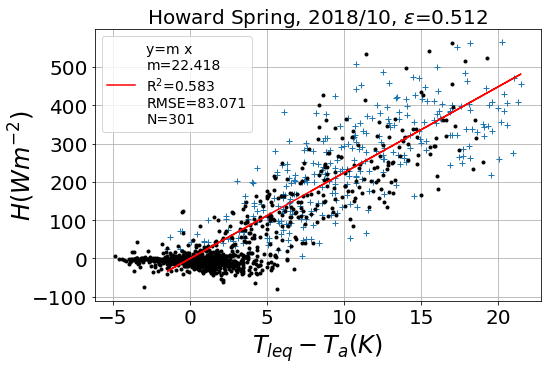

83.07125102094842
75.88327736505755


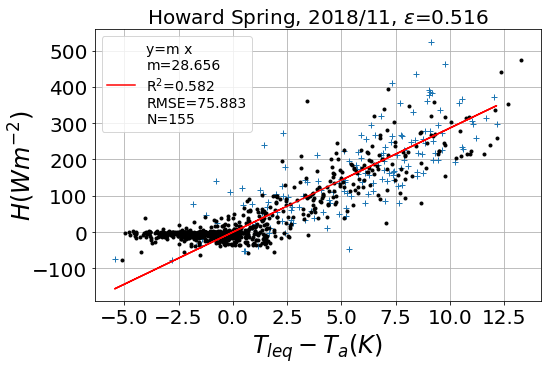

75.88327736505755
49.13217254217481


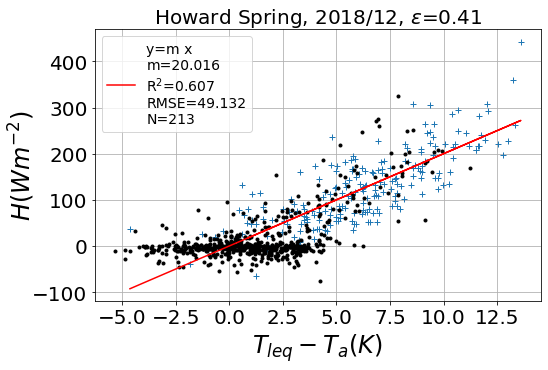

49.13217254217481


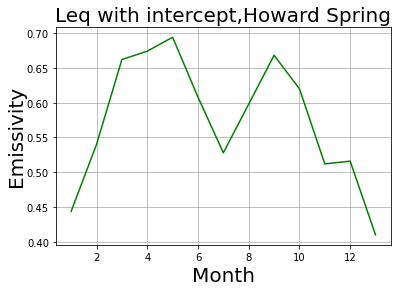

In [53]:
site="Howard Spring"
df=hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_hs=[]
list_slope_hs=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_hs.append(opt_eps)
            list_slope_hs.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_hs.append(np.nan)
            list_slope_hs.append(np.nan)

eps_hs=np.array(list_opteps_hs)## converting into array
eps_hs=eps_hs[~np.isnan(eps_hs)]## removing nan
plt.plot(np.arange(len(eps_hs))+1,eps_hs[~np.isnan(eps_hs)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'Leq with intercept,{0}'.format(str(site))
#fname = 'as_Leq_intercept{0}'.format(str(np.round(yr)))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Tumbarumba:

57.397882619528644


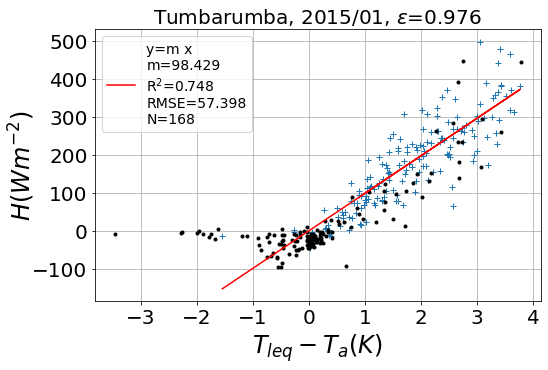

57.397882619528644
58.34311768721162


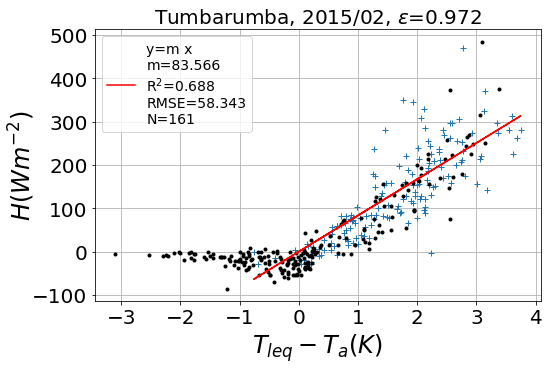

58.34311768721162
49.10299069618819


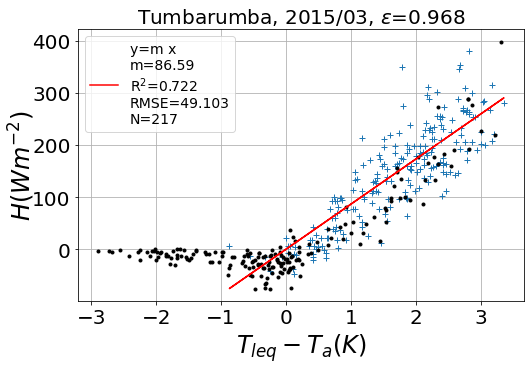

49.10299069618819
60.35673348089977


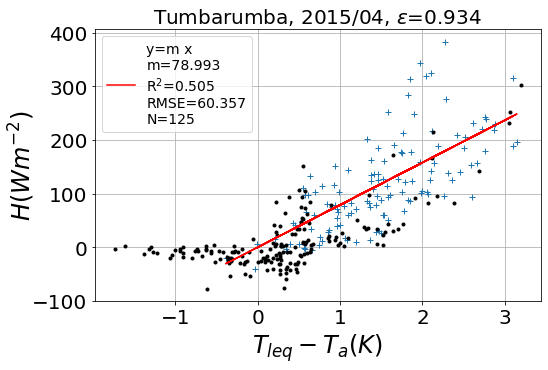

60.35673348089977
54.05427547698068


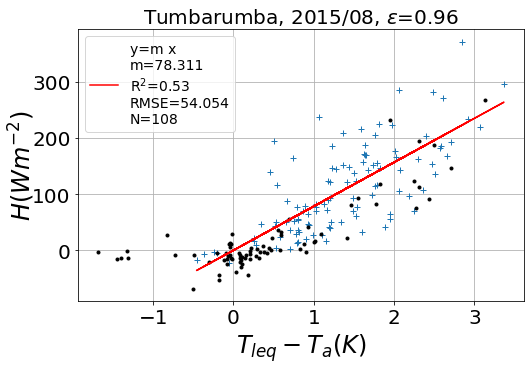

54.05427547698068
50.161590221185854


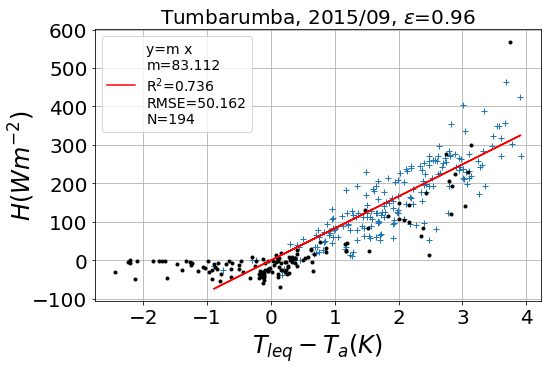

50.161590221185854
54.475059665264915


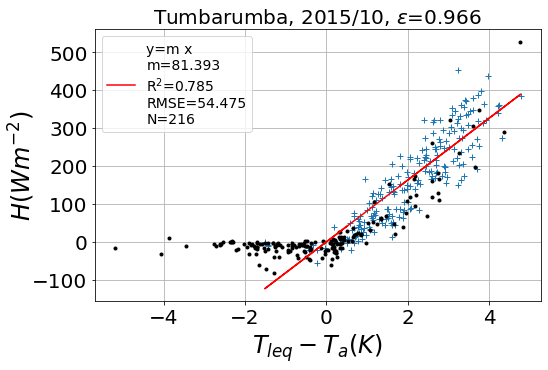

54.475059665264915
59.81234881374536


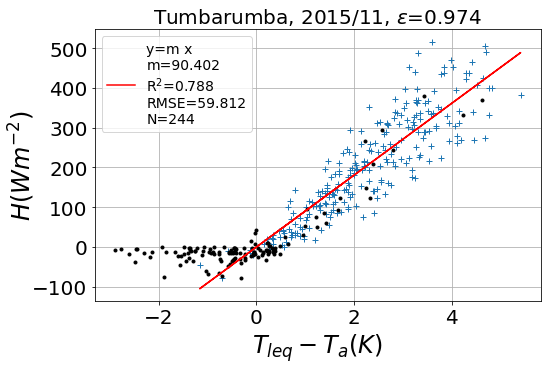

59.81234881374536
57.74303773286796


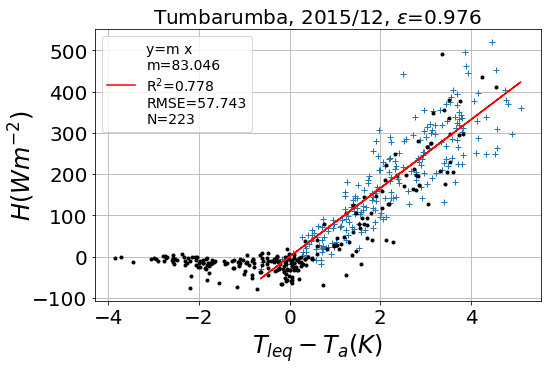

57.74303773286796
56.225225537004555


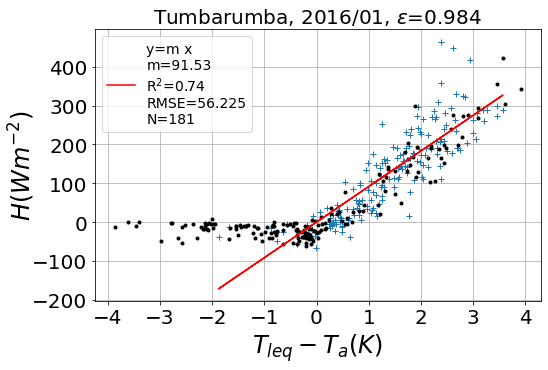

56.225225537004555
48.34166063916921


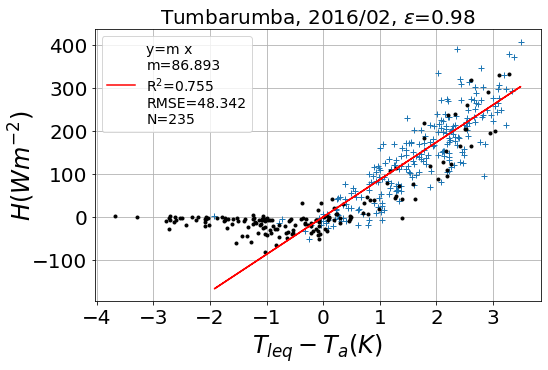

48.34166063916921
42.341292276127554


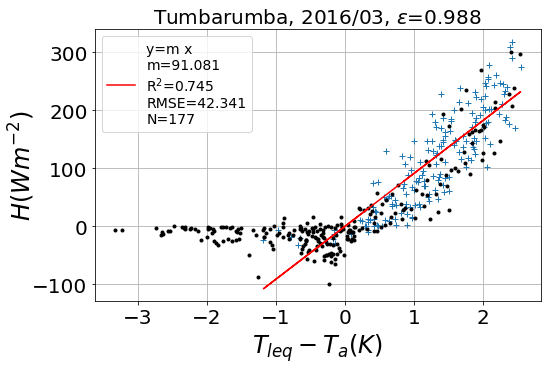

42.341292276127554
42.33174321730354


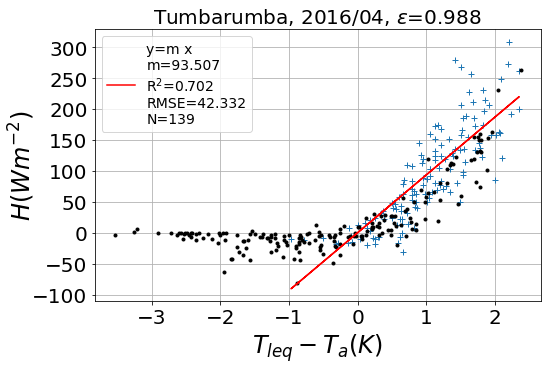

42.33174321730354
48.69083746185042


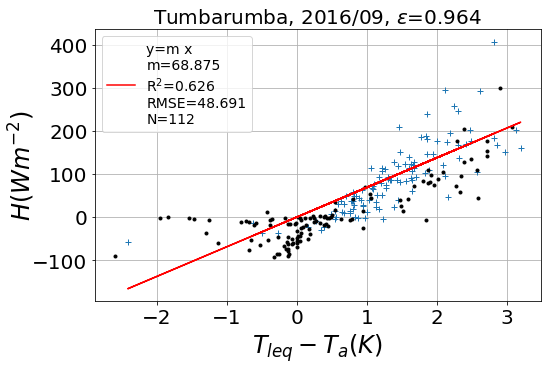

48.69083746185042
60.39807356813879


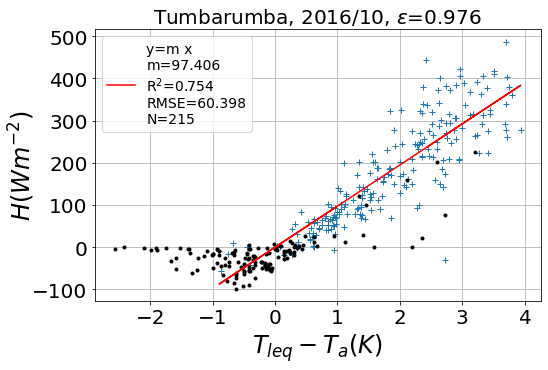

60.39807356813879
64.68610536675692


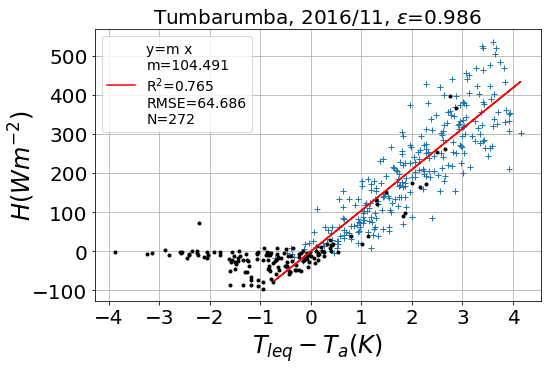

64.68610536675692
55.79600134278301


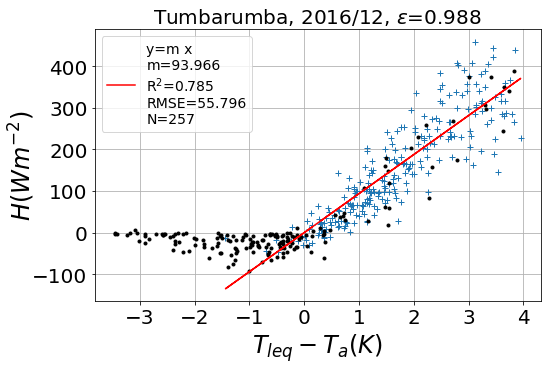

55.79600134278301
56.98796979325729


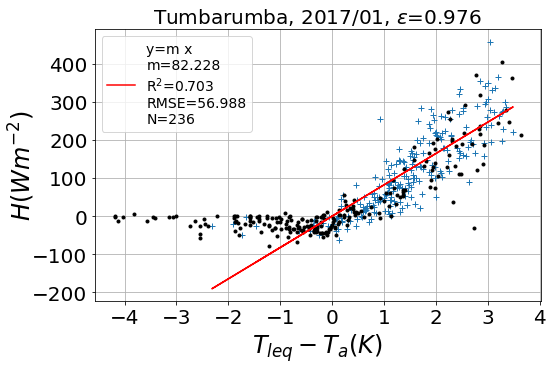

56.98796979325729
61.138314737923785


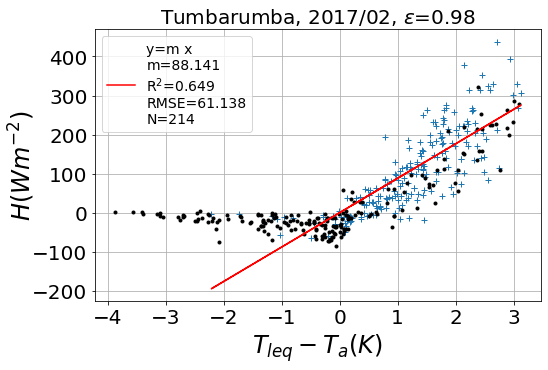

61.138314737923785
51.71399532905417


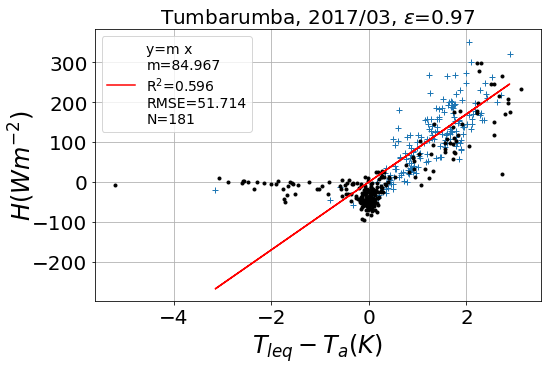

51.71399532905417
47.025266502983186


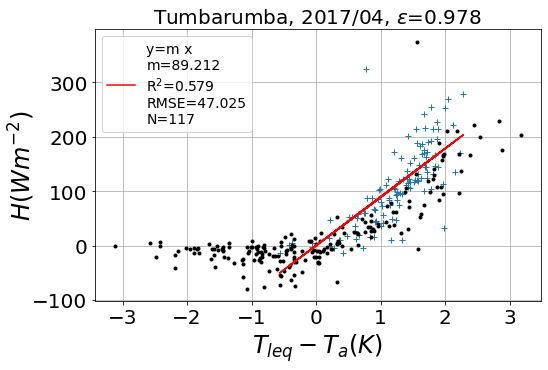

47.025266502983186
33.396046161647945


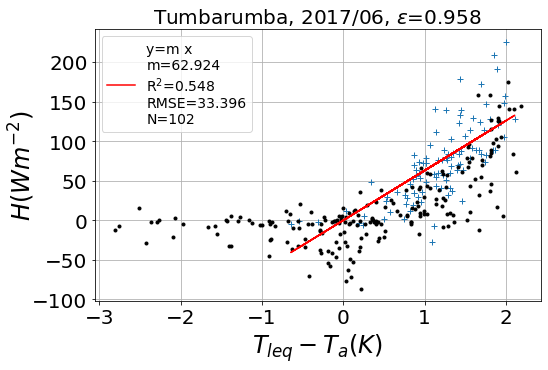

33.396046161647945
33.94740505878637


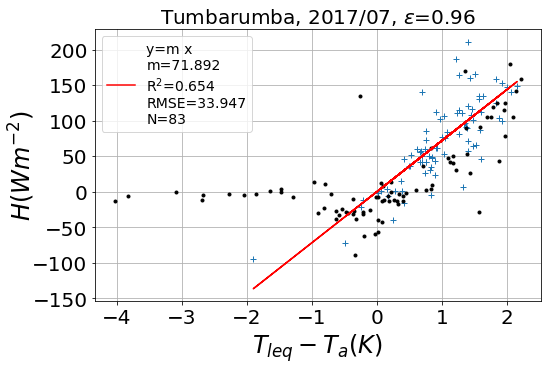

33.94740505878637
61.38462983367942


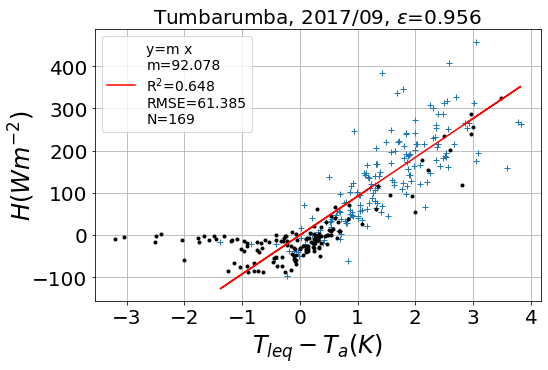

61.38462983367942
53.39463100769019


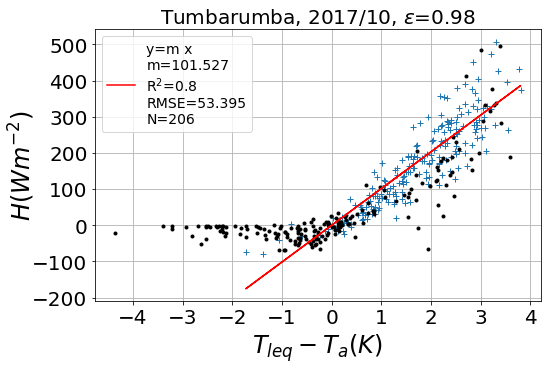

53.39463100769019
54.39749049411483


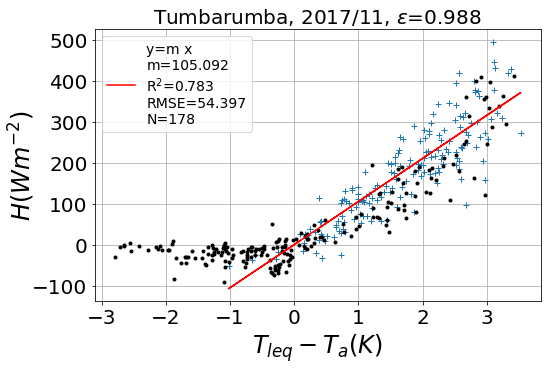

54.39749049411483
56.92205655872359


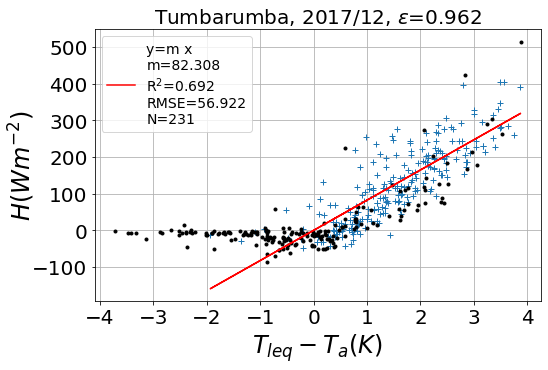

56.92205655872359


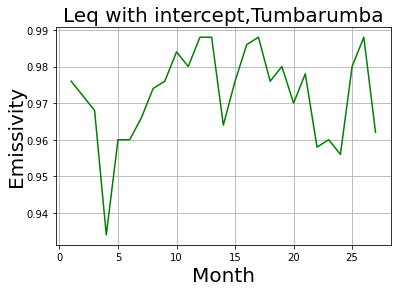

In [54]:
site="Tumbarumba"
df=tumframe.copy()
mnth=0                             
eqdigits=3
list_opteps_tum=[]
list_slope_tum=[]
for yr in range(2015,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_tum.append(opt_eps)
            list_slope_tum.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_tum.append(np.nan)
            list_slope_tum.append(np.nan)
eps_tum=np.array(list_opteps_tum)## converting into array
eps_tum=eps_tum[~np.isnan(eps_tum)]## removing nan
plt.plot(np.arange(len(eps_tum))+1,eps_tum[~np.isnan(eps_tum)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle,fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Litchfield:

58.65397303699298


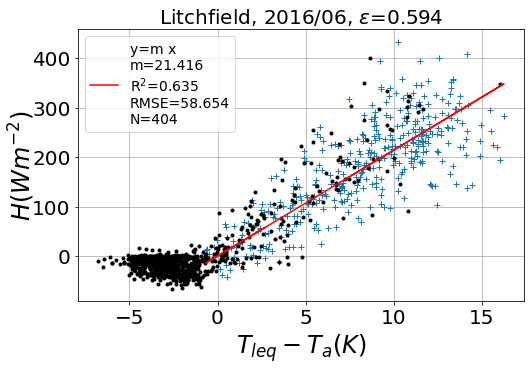

58.65397303699298
62.06670104306022


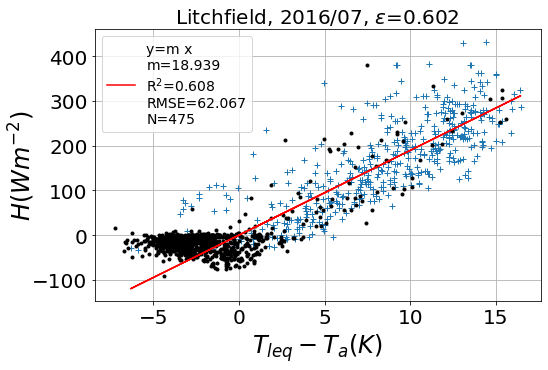

62.06670104306022
64.99519257507751


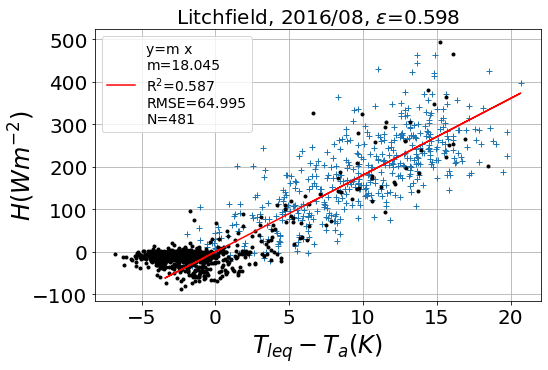

64.99519257507751
59.4612994804828


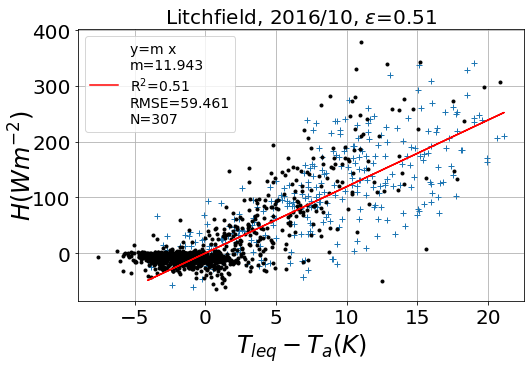

59.4612994804828
47.48901623939432


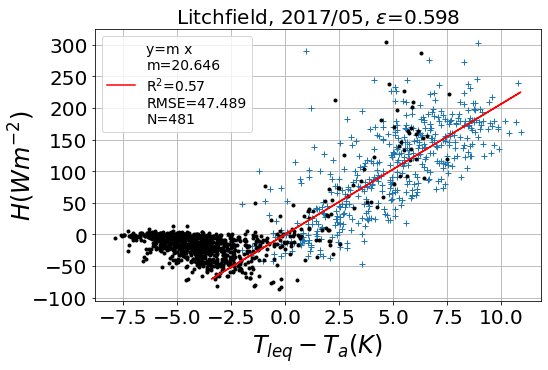

47.48901623939432
47.49326515448488


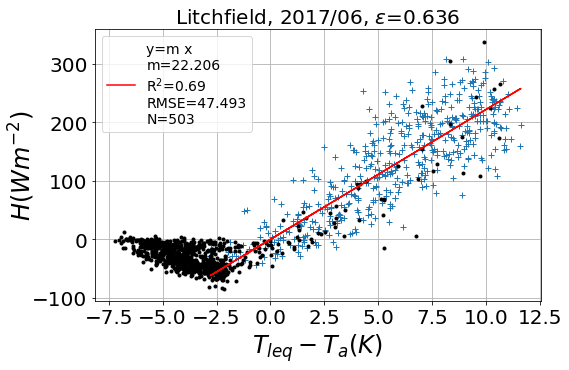

47.49326515448488
64.7289243614204


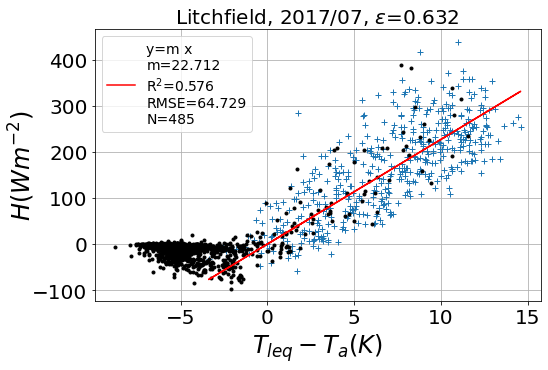

64.7289243614204
63.661706626529764


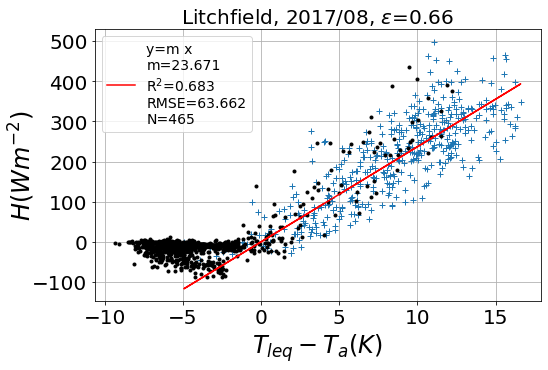

63.661706626529764
77.19873724223807


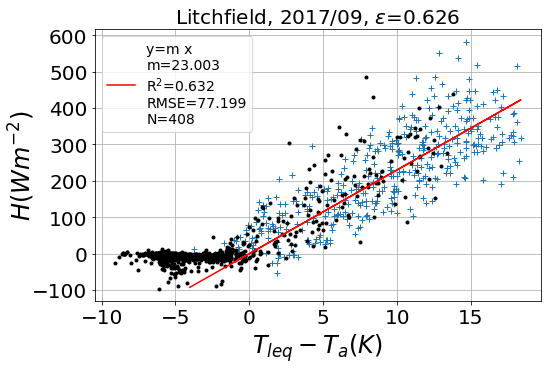

77.19873724223807
68.23873038580773


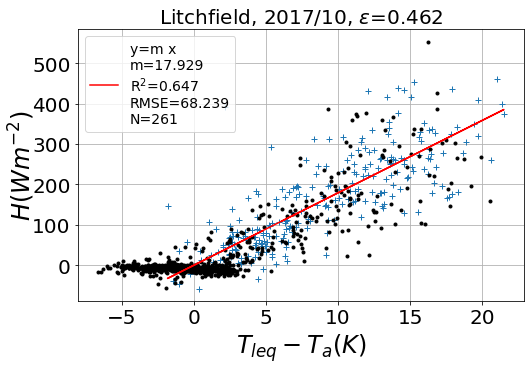

68.23873038580773
56.61277935858162


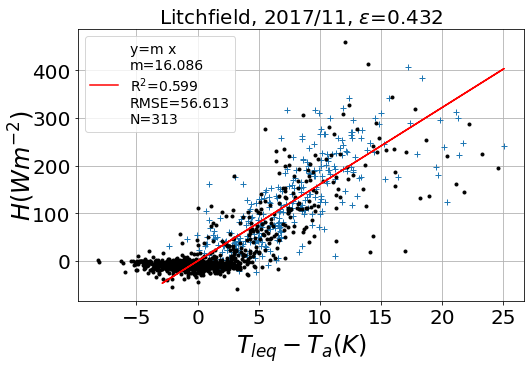

56.61277935858162
65.25509750253222


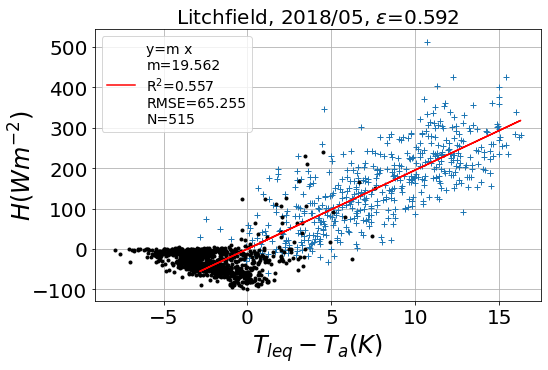

65.25509750253222
60.22211597774685


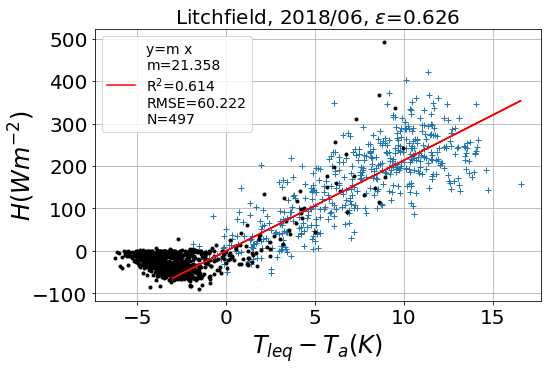

60.22211597774685
58.83776045514574


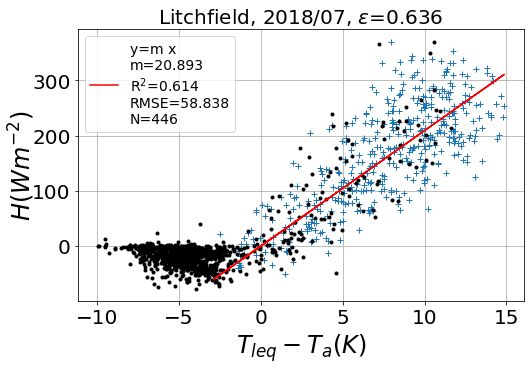

58.83776045514574
60.69628699241717


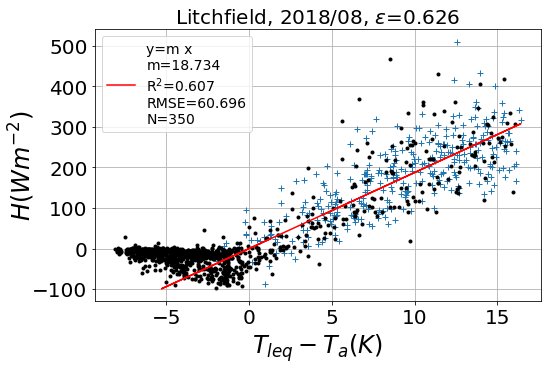

60.69628699241717
62.782715378407175


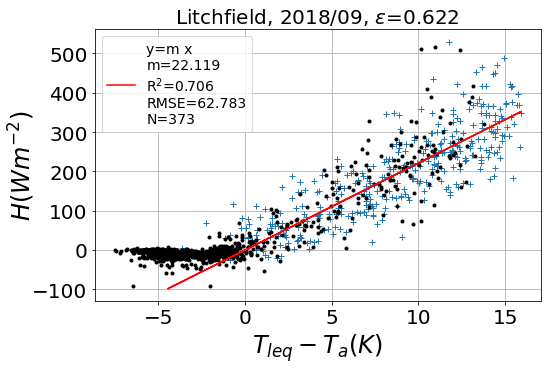

62.782715378407175
64.38198215084901


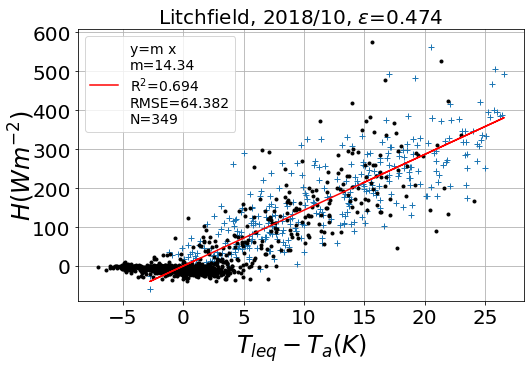

64.38198215084901
49.33254590876377


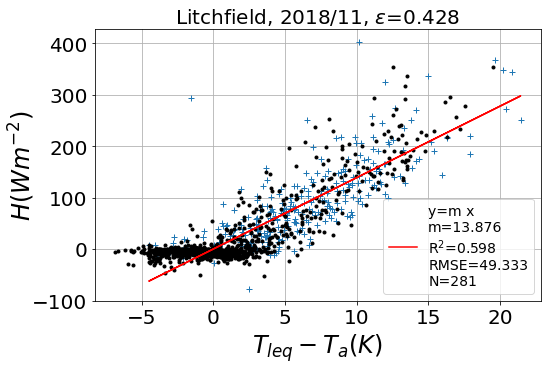

49.33254590876377
40.39423054150099


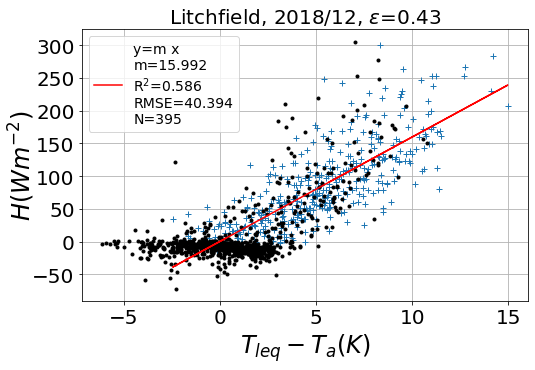

40.39423054150099


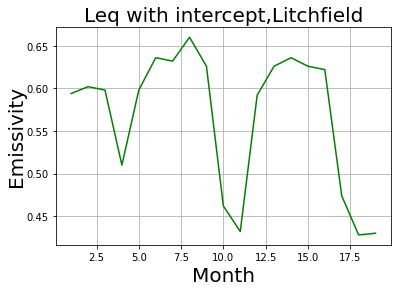

In [55]:
site="Litchfield"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_lf=[]
list_slope_lf=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_lf.append(opt_eps)
            list_slope_lf.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_lf.append(np.nan)
            list_slope_lf.append(np.nan)

eps_lf=np.array(list_opteps_lf)## converting into array
eps_lf=eps_lf[~np.isnan(eps_lf)]## removing nan
plt.plot(np.arange(len(eps_lf))+1,eps_lf[~np.isnan(eps_lf)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle =  'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

20.174023272685805


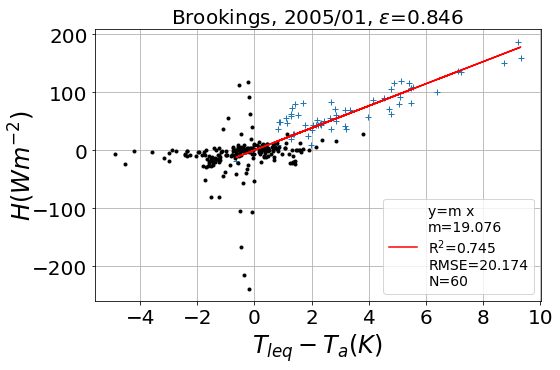

20.174023272685805
27.967756805118473


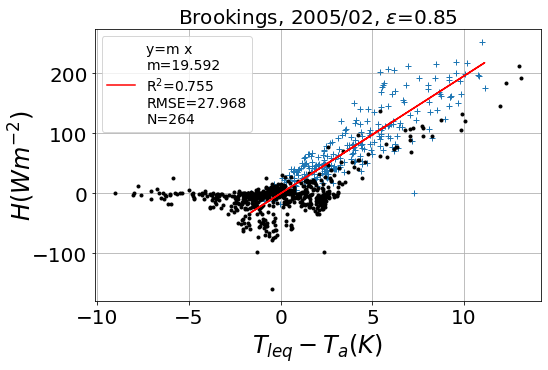

27.967756805118473
33.19423738731253


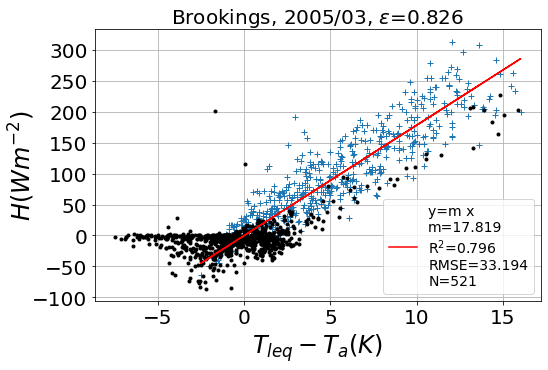

33.19423738731253
37.77695640398094


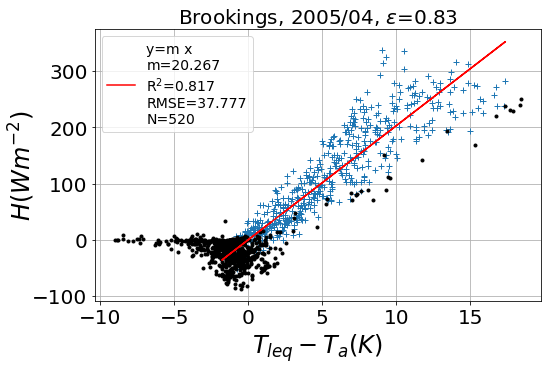

37.77695640398094
38.5924353568276


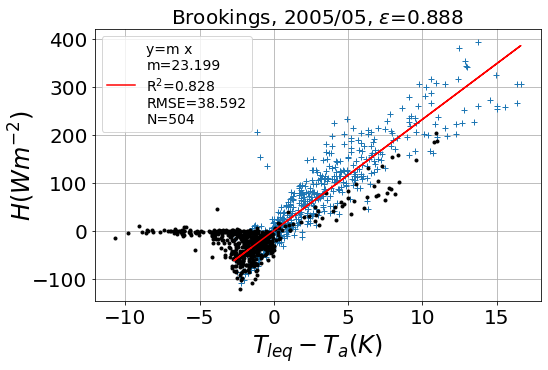

38.5924353568276
27.749121967980106


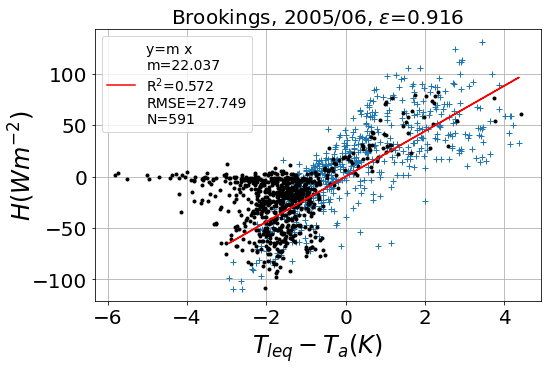

27.749121967980106
26.4210337972418


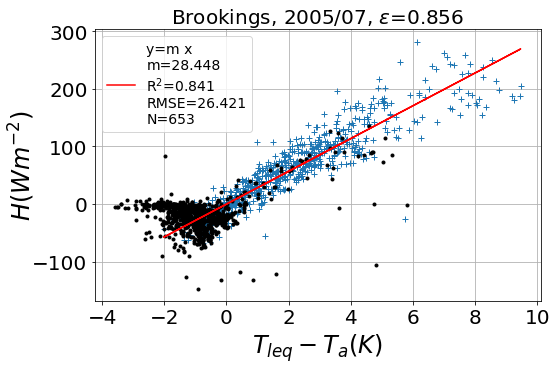

26.4210337972418
29.20776317304726


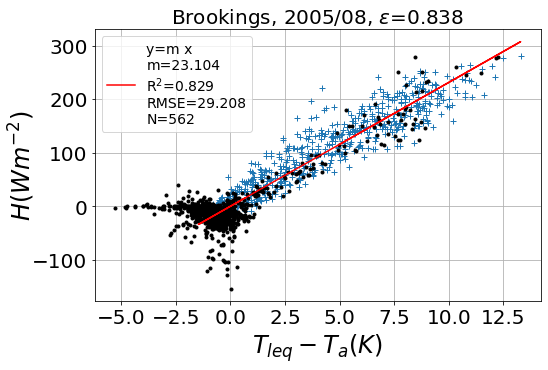

29.20776317304726
27.733465152026362


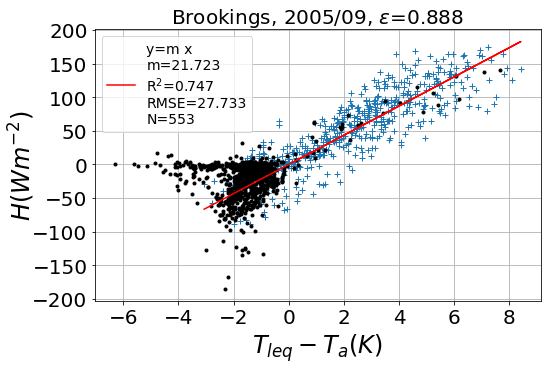

27.733465152026362
21.70310318698938


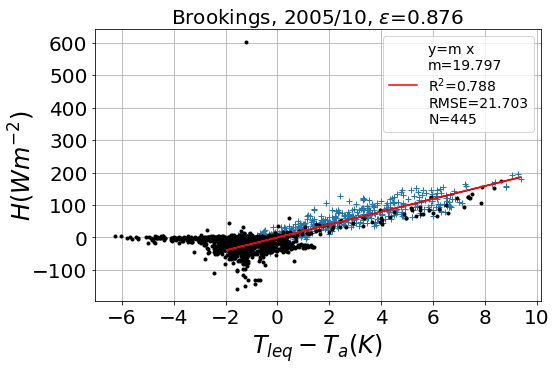

21.70310318698938
18.74708781109788


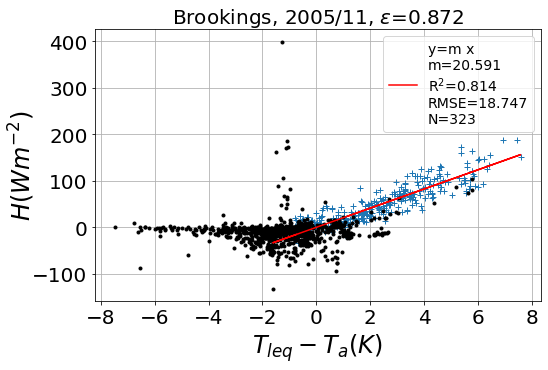

18.74708781109788
29.357720804785504


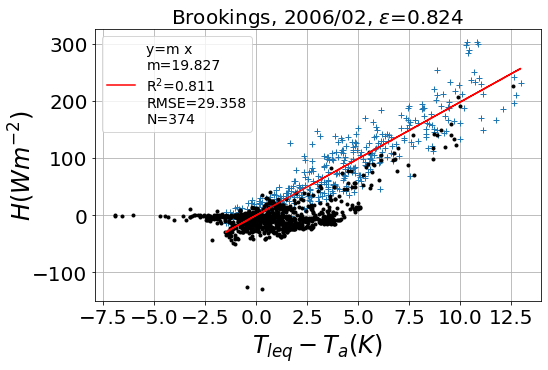

29.357720804785504
39.96246902631444


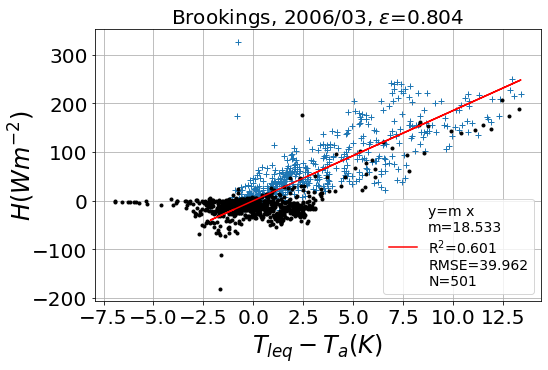

39.96246902631444
34.8096748317305


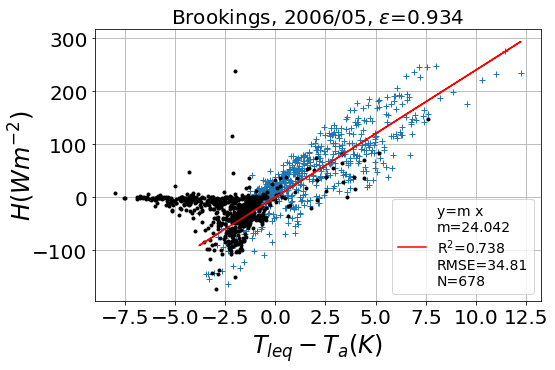

34.8096748317305
31.536079109787142


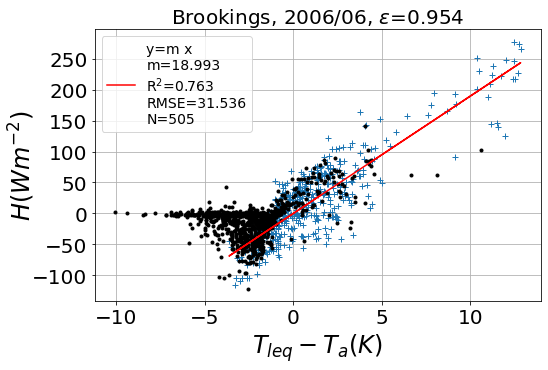

31.536079109787142
37.41323183278695


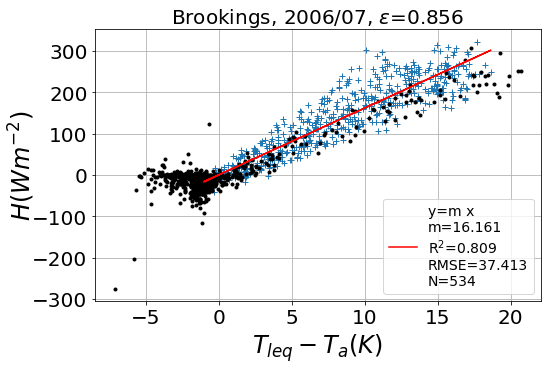

37.41323183278695
33.331611378694234


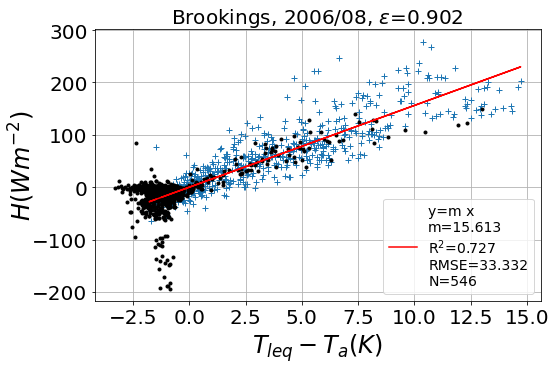

33.331611378694234
21.93556241665072


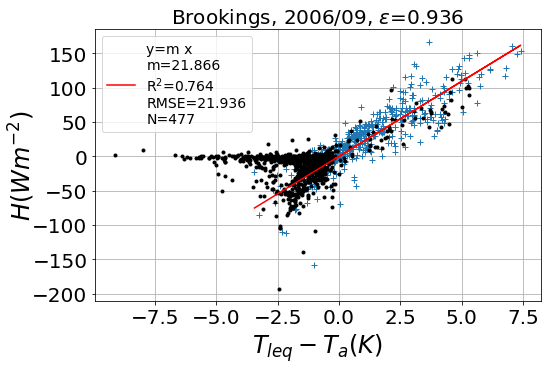

21.93556241665072
28.649393308332137


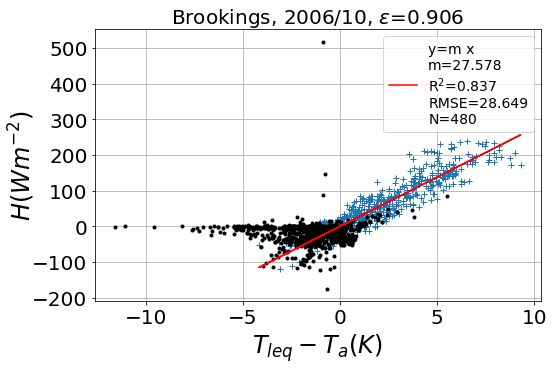

28.649393308332137
30.051968297159217


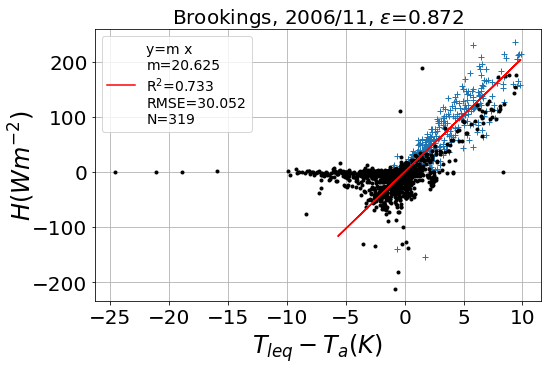

30.051968297159217
25.237548631387146


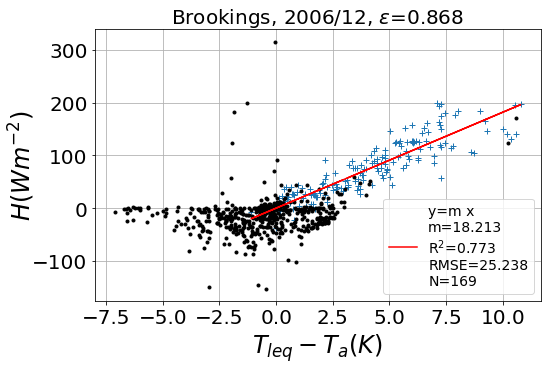

25.237548631387146


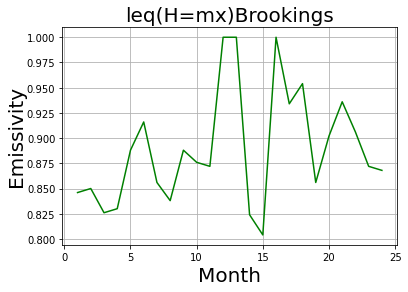

In [56]:
site="Brookings"
df=brookframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_br=[]
list_slope_br=[]
for yr in range(2005,2007):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_br.append(opt_eps)
            list_slope_br.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_br.append(1)
            list_slope_br.append(np.nan)

plt.plot(np.arange(len(list_opteps_br))+1,list_opteps_br,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'Leq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Yatir

56.82155992597203


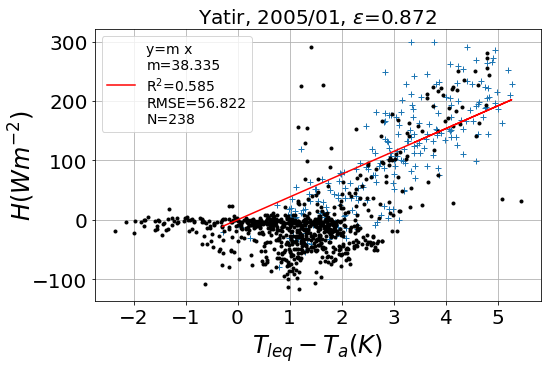

56.82155992597203
57.94141811798598


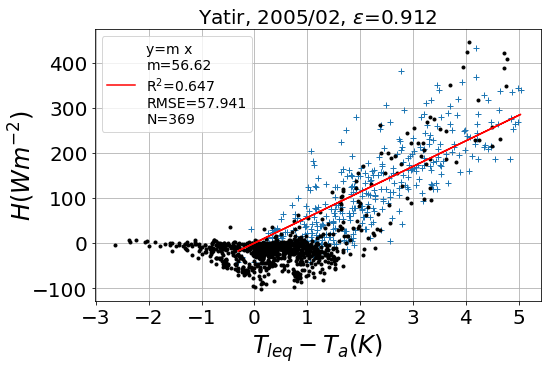

57.94141811798598
80.33533212910868


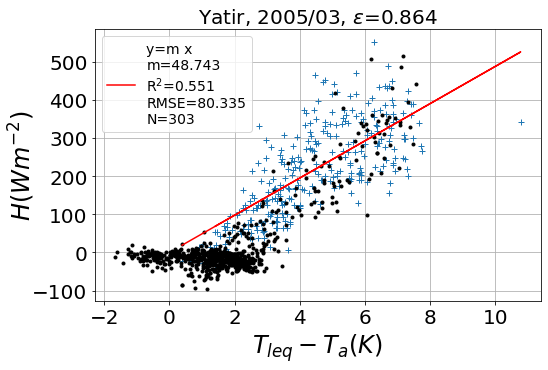

80.33533212910868
73.94031221743629


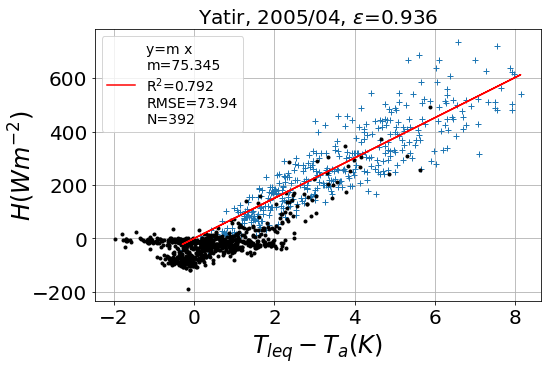

73.94031221743629
97.43810853503787


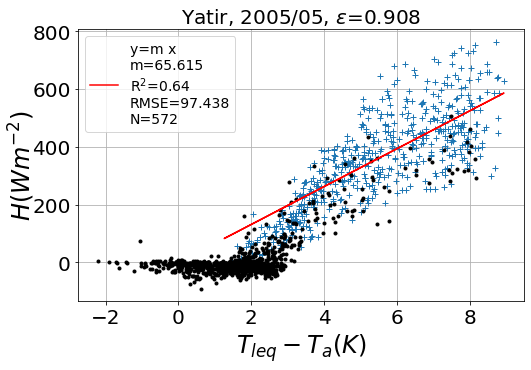

97.43810853503787
110.28009404287619


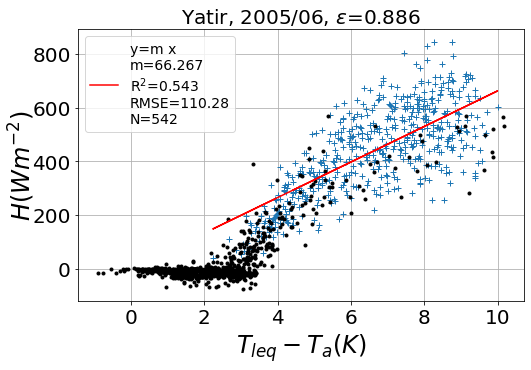

110.28009404287619
102.24698439642604


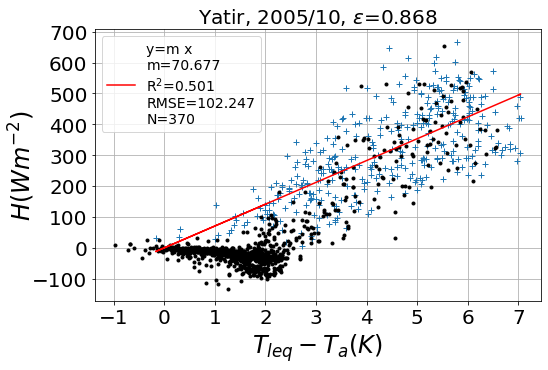

102.24698439642604
70.29638767587552


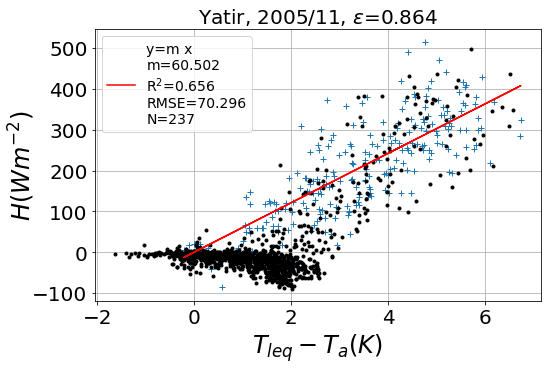

70.29638767587552


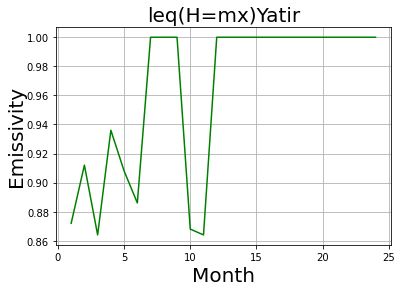

In [57]:
site="Yatir"
df=yatframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_ya=[]
list_slope_ya=[]
for yr in range(2005,2007): ## we got data just for one year
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_ya.append(opt_eps)
            list_slope_ya.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_ya.append(1)
            list_slope_ya.append(np.nan)

plt.plot(np.arange(len(list_opteps_ya))+1,list_opteps_ya,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'Leq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [58]:
from matplotlib.ticker import LinearLocator

## Adelaide River:

49.3529686811126


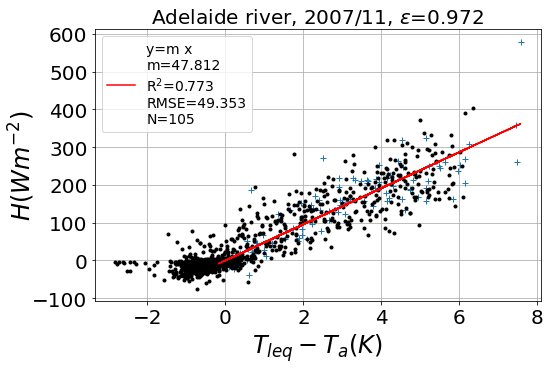

49.3529686811126
39.60969383412543


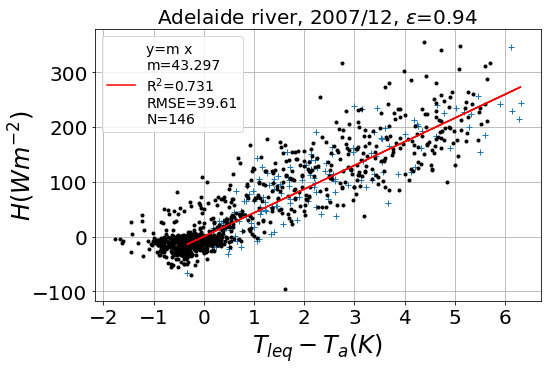

39.60969383412543
43.6101422651482


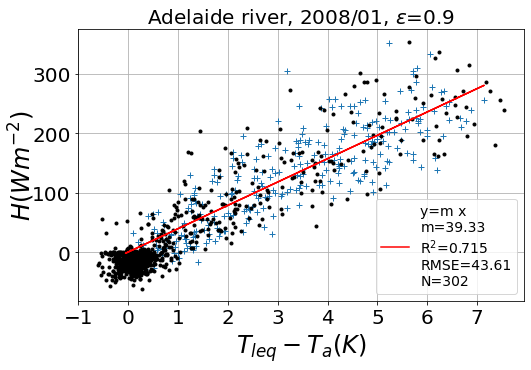

43.6101422651482
41.21715694296825


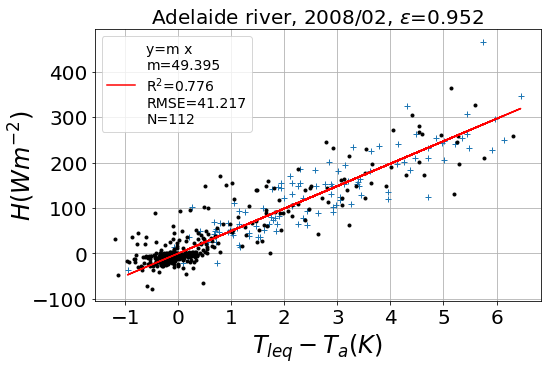

41.21715694296825
48.88164890786868


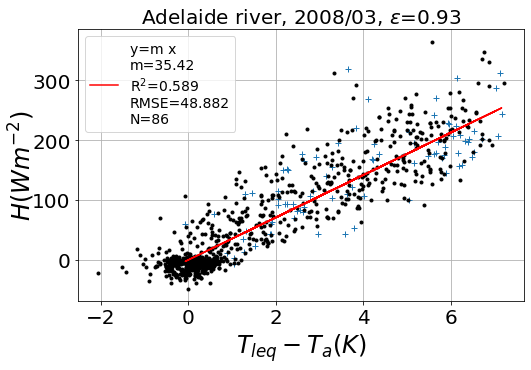

48.88164890786868
40.29904334462074


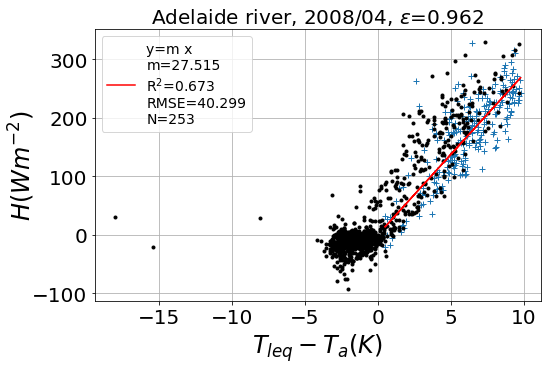

40.29904334462074
41.38697487622302


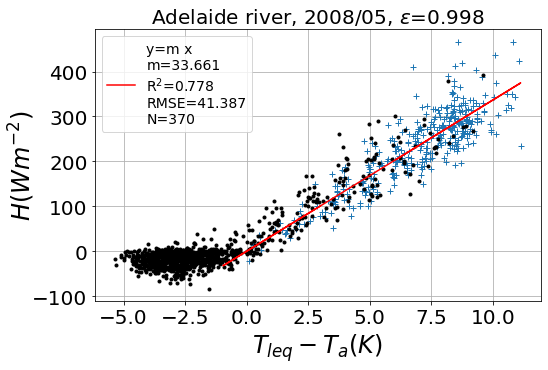

41.38697487622302
37.14083731881499


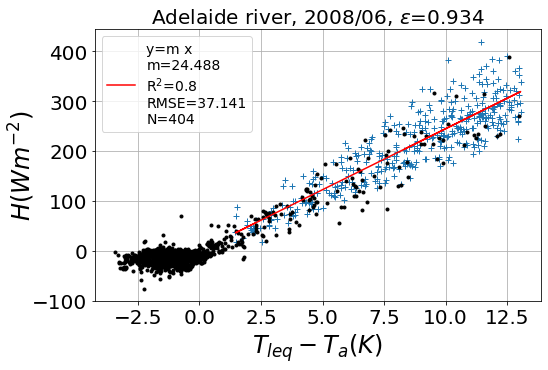

37.14083731881499


KeyboardInterrupt: 

In [59]:
site="Adelaide river"
df=arframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_ar=[]
list_slope_ar=[]
for yr in range(2007,2009):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_ar.append(opt_eps)
            list_slope_ar.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_ar.append(1)
            list_slope_ar.append(np.nan)

plt.plot(np.arange(len(list_opteps_ar))+1,list_opteps_ar,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'Leq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

# Short equation:

In [60]:
def opteps_ols_ign(years, df_all,mnth,xcol = 'DT1', ycol = 'Fh',
                       epsmin=0.4, epsmax=0.995, epsincr=0.005, eqdigits=3):
    
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)]
         #&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                #&(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    for j in range(len(epsilon1)) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        ##########
        list_T_s12 = tf_T_s12(df12.Flu)
        df12 = df12.assign(T_s12=list_T_s12)
        list_H = df.Fh
        list_DT1 = df.T_s1 - df.T_a
        df = df.assign(DT1=(df.T_s1 - df.T_a))
        list_DT12 = df12.T_s12 - df12.T_a
        df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
        try:
            
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
                 opteps_As.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As.loc[k]=[np.nan, np.nan, 1, r2]   
            
        k=k+1
        
    
    df_eps= opteps_As.copy()
    
    df_eps.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps.eps.iloc[0],df_eps.m.iloc[0]
        
       

In [61]:
opteps_ols_ign(2005,brookframe,8)

In [62]:
def opteps_months_ign (site,years, df_all,mnth,epsilon1,xcol = 'DT1', ycol = 'Fh' , eqdigits=3):
    """Plot a panel per month with H and delT."""
    
    
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)&(df_all.Fn > 25) & (df_all.Ws > 2)]
    
         
    
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
    tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
    list_T_s1 = tf_T_s1(df.Flu)
    df = df.assign(T_s1=list_T_s1)
        ##########
    list_T_s12 = tf_T_s12(df12.Flu)
    df12 = df12.assign(T_s12=list_T_s12)
    list_H = df.Fh
    list_DT1 = df.T_s1 - df.T_a
    df = df.assign(DT1=(df.T_s1 - df.T_a))
    list_DT12 = df12.T_s12 - df12.T_a
    df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
    plt.figure(figsize=(8,5))   
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))#.format(list_months))
    plt.plot(df12.DT12,df12.Fh,".k",label='_nolegend_')
    plt.xlabel(r'$T_{seq} - T_{a} (K)$', ha='center',fontsize=24,fontweight = 'bold')
    plt.ylabel(r'$H(W m^{-2})$', labelpad=10, va='center',fontsize=24,fontweight = 'bold')
    plt.title('{0}, {1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    
        
    plt.xticks(fontsize=20) #[-5,0,5,10,15],
    plt.yticks(fontsize=20)
    plt.xlim(-5, 12)
    plt.ylim(-150, 500)
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="best", fontsize=14)
    plt.grid()
    plt.show()
        
        

25.669827703191054


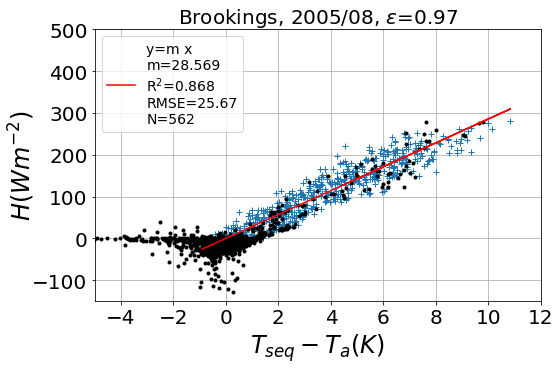

In [63]:
opteps_months_ign ('Brookings',2005,brookframe,8,0.97)

In [ ]:
import itertools

## Brookings

In [ ]:
site="Brookings"
df=brookframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_br=[]
optslp_ign_br=[]
for yr in range(2005,2006):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_br.append(opt_eps)
            optslp_ign_br.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_br.append(1)
            optslp_ign_br.append(np.nan)

plt.plot(np.arange(len(opteps_ign_br))+1,opteps_ign_br,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Yatir

In [ ]:
site="Yatir"
df=yatframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_ya=[]
optslp_ign_ya=[]
for yr in range(2005,2006):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_ya.append(opt_eps)
            optslp_ign_ya.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_ya.append(1)
            optslp_ign_ya.append(np.nan)

plt.plot(np.arange(len(opteps_ign_ya))+1,opteps_ign_ya,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Fig 3q of holmes:

In [ ]:
list_eps=list(flatten(list_opteps_ya))
list_eps=[np.nan if x==1 else x for x in list_eps]
list_eps1=list(opteps_ign_ya)
list_eps1=[np.nan if x==1 else x for x in list_eps1]
months=np.arange(1,13)
plt.plot(months,list_eps[0:12],'*',color='b')
plt.plot(months,list_eps1,'.',color='k')
plt.xlabel('Months', ha='center',fontsize=20)
plt.ylabel('$\epsilon_{plot}$', labelpad=10, va='center',fontsize=20)
plt.legend(['leq','seq'],loc='best')
plt.xticks(np.arange(1,13,1),fontsize=20)
plt.yticks(np.arange(0.81,1.02,0.03),fontsize=20)
plottitle = 'Yatir, {0}'.format(str(np.round(2005)))
fname = 'Yatir_emmi_twoequ'.format(str(np.round(2005)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
        

In [ ]:
list_eps=list(flatten(list_opteps_br))
list_eps=[np.nan if x==1 else x for x in list_eps]
list_eps1=list(opteps_ign_br)
list_eps1=[np.nan if x==1 else x for x in list_eps1]
months=np.arange(1,13)
plt.plot(months,list_eps[0:12],'*',color='b')
plt.plot(months,list_eps1,'.',color='k')
plt.xlabel('Months', ha='center',fontsize=20)
plt.ylabel('$\epsilon_{plot}$', labelpad=10, va='center',fontsize=20)
plt.legend(['leq','seq'],loc='lower right')
plt.xticks(np.arange(1,13,1),fontsize=24)
plt.yticks(np.arange(0.81,1.02,0.03),fontsize=20)
plottitle = 'Brookings, {0}'.format(str(np.round(2005)))
fname = 'brook_emmi_twoequ'.format(str(np.round(2005)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
        

## Adelaide River

In [ ]:
site="Adelaide river"
df=arframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_ar=[]
optslp_ign_ar=[]
for yr in range(2007,2009):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign(yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_ar.append(opt_eps)
            optslp_ign_ar.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_ar.append(1)
            optslp_ign_ar.append(np.nan)

plt.plot(np.arange(len(opteps_ign_ar))+1,opteps_ign_ar,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Alice Springs

In [ ]:
site="Alice Springs"
df=asframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_as=[]
optslp_ign_as=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_as.append(opt_eps)
            optslp_ign_as.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_as.append(1)
            optslp_ign_as.append(np.nan)

plt.plot(np.arange(len(opteps_ign_as))+1,opteps_ign_as,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Howard Springs

In [ ]:
site="Howard spring"
df=hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_hs=[]
optslp_ign_hs=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_hs.append(opt_eps)
            optslp_ign_hs.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_hs.append(1)
            optslp_ign_hs.append(np.nan)

plt.plot(np.arange(len(opteps_ign_hs))+1,opteps_ign_hs,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Tumbarumba

In [ ]:
site="Tumbarumba"
df=tumframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_tum=[]
optslp_ign_tum=[]
for yr in range(2015,2017):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_hs.append(opt_eps)
            optslp_ign_hs.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_hs.append(1)
            optslp_ign_hs.append(np.nan)

plt.plot(np.arange(len(opteps_ign_hs))+1,opteps_ign_hs,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Litchfield

In [ ]:
site="Litchfield"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_lf=[]
optslp_ign_lf=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_lf.append(opt_eps)
            optslp_ign_lf.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_lf.append(1)
            optslp_ign_lf.append(np.nan)

plt.plot(np.arange(len(opteps_ign_lf))+1,opteps_ign_lf,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Sturt Plains

In [ ]:
site="Sturt Plains"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_sp=[]
optslp_ign_sp=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_sp.append(opt_eps)
            optslp_ign_sp.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_sp.append(1)
            optslp_ign_sp.append(np.nan)

plt.plot(np.arange(len(opteps_ign_sp))+1,opteps_ign_sp,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Titree

In [ ]:
site="Titree"
df=titreeframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_tt=[]
optslp_ign_tt=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_tt.append(opt_eps)
            optslp_ign_tt.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_tt.append(1)
            optslp_ign_tt.append(np.nan)

plt.plot(np.arange(len(opteps_ign_tt))+1,opteps_ign_tt,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Dalyuncleared

In [ ]:
site="Dalyuncleared"
df=dalyuncframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
opteps_ign_du=[]
optslp_ign_du=[]
for yr in range(2016,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_ols_ign (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            opteps_ign_du.append(opt_eps)
            optslp_ign_du.append(slope)
            opteps_months_ign(site,yr,df,mnth,opt_eps)
        else:
            opteps_ign_du.append(1)
            optslp_ign_du.append(np.nan)

plt.plot(np.arange(len(opteps_ign_du))+1,opteps_ign_du,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq(H=mx){0}'.format(str(site))
fname = 'seq_mx{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

# SI figures:

In [ ]:
plt.figure(figsize=(8,6))
df=asframe.copy()
plt.plot(df.index,df.Flu,"*",color= 'blue')
plt.plot(df.index,df.Fld, ".",color= 'orange')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time',ha='center',fontsize=20)
plt.ylabel('Observed longwave $(W/m^{-2})$', labelpad=10, va='center',fontsize=20)
plt.legend(['Upwelling','Downwelling'],fontsize=20,framealpha=0.5,loc='best')
plottitle = 'Alice Springs, Mulga '
fname = 'Alice_spring_longw'
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
####

In [ ]:
plt.figure(figsize=(8,6))
df=tumframe.copy()
plt.plot(df.index,df.Flu,"*",color= 'blue')
plt.plot(df.index,df.Fld, ".",color= 'orange')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time',ha='center',fontsize=20)
plt.ylabel('Observed longwave $(W/m^{-2})$', labelpad=10, va='center',fontsize=20)
plt.legend(['Upwelling','Downwelling'],fontsize=20,framealpha=0.5,loc='best')
plottitle = 'Tumbarumba, Eucalypt forest'
fname = 'tum_longw'
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
####

## RMSE and Emissivity

In [ ]:
def opteps_RLM (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    k=0
    epsilon1=np.arange(0.4,1,0.002).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years) & (df_all.index.month == mnth)& 
                (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
        tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=True).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_rlm.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_rlm.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
        
        
    df_eps_ref=opteps_rlm.copy()## copying data frame for sorting based on minimum rmse
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0],df_eps_ref)
        
            

In [ ]:
result=opteps_RLM (2017, asframe,7)

In [ ]:
df_all=asframe.copy()
yr=2018
mnth=12
result=opteps_RLM (yr, df_all,mnth)
df=result[2].copy()
plt.figure(figsize=(8,6))
plt.plot(df.eps_ref,df.RMSE,"*",color= 'blue')
#plt.plot(df.index,df.Fld, ".",color= 'orange')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$\epsilon$',ha='center',fontsize=20)
plt.ylabel('RMSE', labelpad=10, va='center',fontsize=20)
#plt.legend(['Upwelling','Downwelling'],fontsize=20,framealpha=0.5,loc='best')
plottitle = r'Alice Springs, leq, '+'{0}'.format(str(yr))+'/{0}'.format(str(mnth))
fname = 'As_leq_rmse'
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

In [ ]:
df_all=spframe.copy()
yr=2016
mnth=2
result=opteps_RLM (yr, df_all,mnth)
df=result[2].copy()
plt.figure(figsize=(8,6))
plt.plot(df.eps_ref,df.RMSE,"*",color= 'blue')
#plt.plot(df.index,df.Fld, ".",color= 'orange')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$\epsilon$',ha='center',fontsize=20)
plt.ylabel('RMSE', labelpad=10, va='center',fontsize=20)
#plt.legend(['Upwelling','Downwelling'],fontsize=20,framealpha=0.5,loc='best')
plottitle = r'Sturt Plains, leq, '+'{0}'.format(str(yr))+'/{0}'.format(str(mnth))
fname = 'As_leq_rmse'
plt.title(plottitle,fontsize=24)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

In [ ]:
df_all=tumframe.copy()
yr=2017
mnth=1
result=opteps_RLM (yr, df_all,mnth)
df=result[2].copy()
plt.figure(figsize=(8,6))
plt.plot(df.eps_ref,df.RMSE,"*",color= 'blue')
#plt.plot(df.index,df.Fld, ".",color= 'orange')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$\epsilon$',ha='center',fontsize=20)
plt.ylabel('RMSE', labelpad=10, va='center',fontsize=20)
#plt.legend(['Upwelling','Downwelling'],fontsize=20,framealpha=0.5,loc='best')

plottitle = r'Tumbarumba, leq, '+'{0}'.format(str(yr))+'/{0}'.format(str(mnth))
fname = 'tum_leq_rmse'
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

In [ ]:
def opteps_ols_ign(years, df_all,mnth,xcol = 'DT1', ycol = 'Fh',
                       epsmin=0.4, epsmax=0.995, epsincr=0.005, eqdigits=3):
    
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)]
         #&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                #&(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    for j in range(len(epsilon1)) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        ##########
        list_T_s12 = tf_T_s12(df12.Flu)
        df12 = df12.assign(T_s12=list_T_s12)
        list_H = df.Fh
        list_DT1 = df.T_s1 - df.T_a
        df = df.assign(DT1=(df.T_s1 - df.T_a))
        list_DT12 = df12.T_s12 - df12.T_a
        df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
        try:
            
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
                 opteps_As.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As.loc[k]=[np.nan, np.nan, 1, r2]   
            
        k=k+1
        
    
    df_eps= opteps_As.copy()
    
    df_eps.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps.eps.iloc[0],df_eps.m.iloc[0],df_eps
        

In [ ]:
df_all=asframe.copy()
yr=2017
mnth=1
result=opteps_ols_ign (yr, df_all,mnth)
df=result[2].copy()
plt.plot(df.eps,df.RMSE,"*",color= 'blue')
plt.figure(figsize=(8,6))
#plt.plot(df.index,df.Fld, ".",color= 'orange')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$\epsilon$',ha='center',fontsize=20)
plt.ylabel('RMSE', labelpad=10, va='center',fontsize=20)
#plt.legend(['Upwelling','Downwelling'],fontsize=20,framealpha=0.5,loc='best')
plottitle = 'Alice Spring, seq'
plottitle = r'Alice Springs,seq, '+'{0}'.format(str(yr))+'/{0}'.format(str(mnth))
fname = 'As_seq_rmse'
plt.title(plottitle,fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

In [ ]:
df_all=tumframe.copy()
yr=2017
mnth=7
result=opteps_ols_ign (yr, df_all,mnth)
df=result[2].copy()
print(df)
plt.figure(figsize=(8,6))
plt.plot(df.eps,df.RMSE,"*",color= 'blue')
plt.figure(figsize=(8,6))
#plt.plot(df.index,df.Fld, ".",color= 'orange')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$\epsilon$',ha='center',fontsize=20)
plt.ylabel('RMSE', labelpad=10, va='center',fontsize=20)
plottitle = r'Tumbarumba,seq, '+'{0}'.format(str(yr))+'/{0}'.format(str(mnth))
fname = 'tum_seq_rmse'
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

# Maes emissivity estimation:

**Here, ε was calculated for each site using (half-)hourly data,selecting those measurements where H was close to 0 (−2 <H < 2 W m −2 ) and excluding rainy days as well as measurements in which the albedo (calculated as α = SW out SW −1in with SW in the incoming and SW out the outgoing shortwave radiation) was above 0.4, to avoid influences of snow or ice. Negative estimates of ε were masked out, and the ε of the site was calculated as the mean, after excluding the outlying**
![image.png](attachment:image.png)

In [ ]:
class eq_eps_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, epsilon, dict=True)
    expr = Eq(epsilon, soln[0][epsilon])
eq_eps_Rlout_Rlin

In [ ]:
def opteps_maes (df_all,years,xcol = 'DT', ycol = 'Fh', 
                     eqdigits=3, epsmin=0.6, epsmax=0.999, epsincr=0.002):
    opteps_As_ref = pd.DataFrame(columns=["Ta","Fh","Fld","Flu","eps"])
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == month)& (df_all.P == 0)&
                (df_all.Fh > -2) & (df_all.Fh < 2)&(df_all.Fsu/df_all.Fsd <= 0.4)]
         #&(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
               # &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    #print(df)
    for j in range(len(df.T_a)) :
        #print(len(df.T_a))
        tf_eps = eq_eps_Rlout_Rlin.rhs.subs({T_s:df.T_a[j],R_lin:df.Fld[j],R_lout:df.Flu[j]}).subs(Variable.__defaults__)
                                                       
        
       
        
        list_eps = np.median(tf_eps)             
        #list_eps = tf_eps((df.Fld),(df.Flu))
        
        #df = df.assign(eps=list_eps)
        
        #opteps_As_ref.loc[k]=[df.T_a, df.Fh,df.Fld,df.Flu,epsilon1[j]]
        
        #print(tf_eps)
        opteps_As_ref.loc[k]=[df.T_a[j], df.Fh[j],df.Fld[j],df.Flu[j],tf_eps]
        k=k+1
        
    df_eps=opteps_As_ref.copy()
    
    
    
   
    return df_eps,df_eps.eps #.eps_ref.iloc[0],df_eps_ref.m.iloc[0],df_eps_ref.c.iloc[0]
        

In [ ]:
eps_maes_brk=[]
for month in range(12):
    x=opteps_maes (brookframe,2005)[1]
    #print(x)
    eps_maes_brk.append(x.median())
    
months=np.arange(1,13)    
plt.plot(months, eps_maes_brk,"*",color= 'blue')
const=np.median(eps_maes_brk)
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.7,ls='dotted')
plt.xlabel('months', ha='center',fontsize=20)
plt.ylabel('emissivity', labelpad=10, va='center',fontsize=20)
plt.grid()
plt.ylim(0,1)
#plt.legend(['Upwelling','Downwelling'])
plottitle = 'Brookings, 2005' #r'Alice Springs,seq, '+'{0}'.format(str(yr))+'/{0}'.format(str(mnth))
plt.title(plottitle)

In [ ]:
list_eps=list(flatten(list_opteps_br))
list_eps=[np.nan if x==1 else x for x in list_eps]
list_eps1=list(opteps_ign_br)
list_eps1=[np.nan if x==1 else x for x in list_eps1]
plt.figure(figsize=(8,5))
months=np.arange(1,13)
plt.plot(months,list_eps[0:12],'*',color='b')
plt.plot(months,eps_maes_brk,'*',color='r')
plt.plot(months,list_eps1,'.',color='k')
plt.xlabel('Months', ha='center',fontsize=20)
plt.ylabel('$\epsilon_{plot}$', labelpad=10, va='center',fontsize=20)
plt.legend(['$leq_{H}$', '$leq_{M}$','$seq$'],loc='lower right', fontsize=14)
plt.xticks(np.arange(1,13,1),fontsize=22)
#plt.yticks(np.arange(0.5,1.02,0.1),fontsize=20)
plt.yticks(fontsize=20)
plottitle = 'Brookings, {0}'.format(str(np.round(2005)))
fname = 'brook_emmi_twoequ'.format(str(np.round(2005)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
        

## Using three variables:

In [ ]:
eps_maes_yat=[]
for month in range(12):
    x=opteps_maes (yatframe,2005)[1]
    print(x)
    eps_maes_yat.append(x.median())
    
months=np.arange(1,13)    
plt.plot(months, eps_maes_yat,"*",color= 'blue')
const=np.median(eps_maes_yat)
plt.axhspan(const-0.0001,const+0.0001,color='m',alpha=0.9, lw=1.7,ls='dotted')
plt.xlabel('months', ha='center',fontsize=20)
plt.ylabel('emissivity', labelpad=10, va='center',fontsize=20)
plt.grid()
#plt.ylim(0,1)
#plt.legend(['Upwelling','Downwelling'])
plottitle = 'Yatir, 2005' #r'Alice Springs,seq, '+'{0}'.format(str(yr))+'/{0}'.format(str(mnth))
plt.title(plottitle)

In [ ]:
list_eps=list(flatten(list_opteps_ya))
list_eps=[np.nan if x==1 else x for x in list_eps]
list_eps1=list(opteps_ign_ya)
list_eps1=[np.nan if x==1 else x for x in list_eps1]
months=np.arange(1,13)
plt.figure(figsize=(8,5))
plt.plot(months,list_eps[0:12],'*',color='b')
plt.plot(months,eps_maes_yat,'*',color='r')
plt.plot(months,list_eps1,'.',color='k')

plt.xlabel('Months', ha='center',fontsize=20)
plt.ylabel('$\epsilon_{plot}$', labelpad=10, va='center',fontsize=20)
plt.legend(['$leq_{H}$', '$leq_{M}$','$seq$'],loc='best', fontsize=14)
plt.xticks(np.arange(1,13,1),fontsize=20)
plt.yticks(fontsize=20)
#plt.yticks(np.arange(0.81,1.02, 0.03),fontsize=20)
plottitle = 'Yatir, {0}'.format(str(np.round(2005)))
fname = 'Yatir_emmi_twoequ'.format(str(np.round(2005)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [ ]:
list_eps=list(flatten(list_opteps_br))
list_eps=[np.nan if x==1 else x for x in list_eps]
list_eps1=list(opteps_ign_br)
list_eps1=[np.nan if x==1 else x for x in list_eps1]
months=np.arange(1,13)
plt.plot(months,list_eps[0:12],'*',color='b')
plt.plot(months,list_eps1,'.',color='k')
plt.xlabel('Months', ha='center',fontsize=20)
plt.ylabel('$\epsilon_{plot}$', labelpad=10, va='center',fontsize=20)
plt.legend(['leq','seq'],loc='lower right')
plt.xticks(np.arange(1,13,1),fontsize=20)
plt.yticks(np.arange(0.81,1.02,0.03),fontsize=20)
plottitle = 'Brookings, {0}'.format(str(np.round(2005)))
fname = 'brook_emmi_twoequ'.format(str(np.round(2005)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()
        